In [359]:
# Importing required modules
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [360]:
# Getting OS agnostic filepath
pwd = os.getcwd()
filepath = os.path.join(os.path.dirname(pwd),"input\\Student Applications & Performance.xlsx")

In [361]:
# Loading the data

df = pd.read_excel(filepath,sheet_name="University information")
df.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [362]:
df.shape

(3400, 56)

In [363]:
df_cp = df.copy()
# for when we make changes to this data

In [364]:
# For quick EDA
# import sweetviz as sv
# clear_report = sv.analyze(df)
# clear_report.show_html('clear_report.html')

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE1      1106 non-null   float64
 9   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 10  STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 11  FIRST_TERM                3400 non-null   int64  
 12  CORE_COURSE_NAME_1_F      3400 non-null   object 
 13  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 14  CORE_COU

In [366]:
df.isnull().sum()
# there is considerable amount of missing values. We might have to drop those columns later on

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

In [367]:
df.describe()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
count,3.400000e+03,3400.000000,1106.000000,2492.000000,2882.000000,3400.000000,3400.000000,3400.000000,3375.000000,3347.000000,2968.000000,2911.000000,3400.000000,3400.000000,3194.000000,3191.000000,3.400000e+03,3.400000e+03,3.400000e+03,3.400000e+03
mean,7.897155e+06,17.994118,20.660036,965.092295,997.758501,200777.000000,200871.000000,0.787353,99.825185,3.202738,2.560647,2.571281,13.985882,12.205000,14.285848,12.511125,3.034025e+05,5.515335e+05,3.446899e+05,7.222052e+04
std,8.083421e+04,0.552052,3.234734,209.088633,156.268221,170.001298,170.001298,0.409240,235.196984,0.455337,0.681273,0.611729,1.554286,2.986294,2.104387,3.470492,4.836255e+05,6.064403e+05,7.871878e+05,2.795679e+05
min,7.755837e+06,16.000000,8.000000,350.000000,530.000000,200508.000000,200602.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.212072e+06
25%,7.827039e+06,18.000000,18.000000,900.000000,910.000000,200608.000000,200702.000000,1.000000,69.000000,2.870000,2.000000,2.000000,13.000000,11.000000,13.000000,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.899052e+06,18.000000,20.000000,990.000000,990.000000,200808.000000,200902.000000,1.000000,69.000000,3.200000,3.000000,3.000000,14.000000,13.000000,14.000000,13.000000,0.000000e+00,1.505400e+05,0.000000e+00,0.000000e+00
75%,7.964008e+06,18.000000,22.000000,1100.000000,1110.000000,200908.000000,201002.000000,1.000000,138.000000,3.560000,3.000000,3.000000,15.000000,15.000000,16.000000,15.000000,5.995800e+05,1.192815e+06,3.241800e+05,1.876155e+05
max,8.037098e+06,26.000000,32.000000,1490.000000,1510.000000,201008.000000,201102.000000,1.000000,5932.000000,4.000000,4.000000,4.000000,21.000000,21.000000,23.000000,23.000000,2.124900e+06,2.124900e+06,5.999940e+06,1.632660e+06


In [368]:
df['RETURNED_2ND_YR'].value_counts()
# This is the target variable

1    2677
0     723
Name: RETURNED_2ND_YR, dtype: int64

In [369]:
# Renaming target feature
df['Target'] = df['RETURNED_2ND_YR']

# Swapping the values so that 1 represents the students who has left
df['Target'] = df['RETURNED_2ND_YR'].map(lambda x: 0 if x==1 else 1)
df.drop('RETURNED_2ND_YR',axis=1,inplace=True)

df['Target'].value_counts()
# It is an imbalanced data

0    2677
1     723
Name: Target, dtype: int64

# EDA
## Target 

In [370]:
# Imbalanced target
df['Target'].value_counts(normalize=True)*100

0    78.735294
1    21.264706
Name: Target, dtype: float64

Text(0.5, 1.0, 'Bar plot')

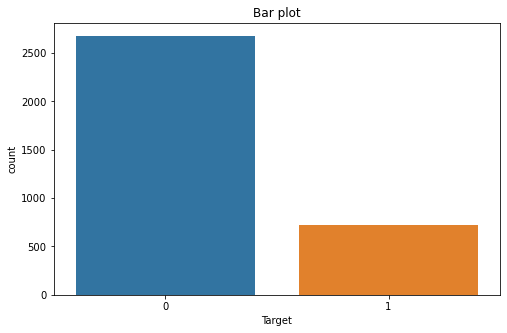

In [371]:
plt.figure(figsize=(8,5))

sns.countplot(data=df,x='Target')
plt.title('Bar plot')

## Student identifier

In [372]:
df['STUDENT IDENTIFIER'].nunique()
# insignificant variable

3400

## Student age

In [373]:
df['STDNT_AGE'].describe()
# Most of the students are the age of 18 years

count    3400.000000
mean       17.994118
std         0.552052
min        16.000000
25%        18.000000
50%        18.000000
75%        18.000000
max        26.000000
Name: STDNT_AGE, dtype: float64

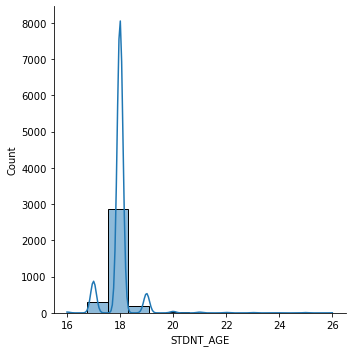

In [374]:
sns.displot(data=df,x='STDNT_AGE',kde=True)

Text(0.5, 1.0, 'Count of age group w.r.t attrition')

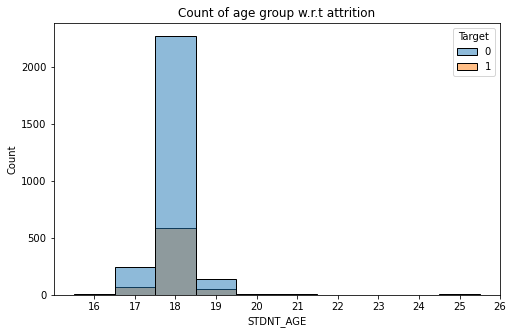

In [375]:
plt.figure(figsize=(8,5))

sns.histplot(data=df,x='STDNT_AGE',hue='Target',binwidth=1, stat='count')
plt.xticks(ticks=np.arange(16.5,27.5,1),labels=np.arange(16,27))
plt.title('Count of age group w.r.t attrition')

In [376]:
pd.crosstab(df['STDNT_AGE'],df['Target'])

Target,0,1
STDNT_AGE,,
16,5,3
17,241,68
18,2271,589
19,139,51
20,8,6
21,3,4
22,3,1
23,3,0
24,0,1


In [377]:
pd.crosstab(df['STDNT_AGE'],df['Target'],normalize='index')

Target,0,1
STDNT_AGE,,
16,0.625000,0.375000
17,0.779935,0.220065
18,0.794056,0.205944
19,0.731579,0.268421
20,0.571429,0.428571
21,0.428571,0.571429
22,0.750000,0.250000
23,1.000000,0.000000
24,0.000000,1.000000


Text(0.5, 1.0, 'Attrition percentage across Age')

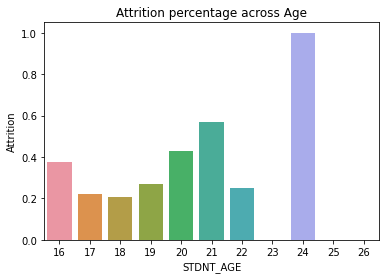

In [378]:
# To get attrition rates as percentage across the age profile
age_att_crosstab = pd.crosstab(df['STDNT_AGE'],df['Target'],normalize='index')

sns.barplot(data=age_att_crosstab,
            x=age_att_crosstab.index,
           y=age_att_crosstab[1])
plt.ylabel("Attrition")
plt.title("Attrition percentage across Age")

<AxesSubplot:xlabel='STDNT_AGE'>

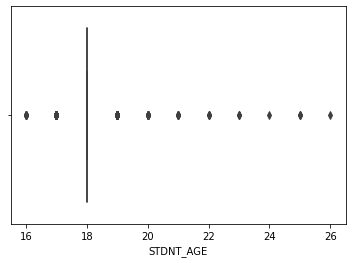

In [379]:
# outliers in age group 
sns.boxplot(x=df['STDNT_AGE'])

## Student gender

In [380]:
df['STDNT_GENDER'].value_counts()

F    2140
M    1260
Name: STDNT_GENDER, dtype: int64

In [381]:
df['STDNT_GENDER'].value_counts(normalize=True)*100
# Female students are greater than male students

F    62.941176
M    37.058824
Name: STDNT_GENDER, dtype: float64

<AxesSubplot:xlabel='STDNT_GENDER', ylabel='count'>

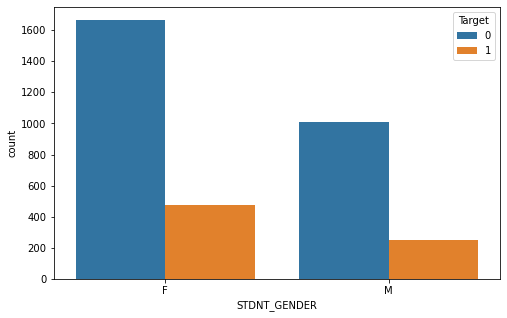

In [382]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='STDNT_GENDER',hue='Target')

In [383]:
# Attrition across both age and gender
df.pivot_table(index=['STDNT_AGE','Target'],columns=['STDNT_GENDER'],values='STUDENT IDENTIFIER',aggfunc='count')

STDNT_GENDER           F      M
STDNT_AGE Target               
16        0          2.0    3.0
          1          1.0    2.0
17        0        159.0   82.0
          1         47.0   21.0
18        0       1436.0  835.0
          1        396.0  193.0
19        0         62.0   77.0
          1         26.0   25.0
20        0          3.0    5.0
          1          2.0    4.0
21        0          1.0    2.0
          1          2.0    2.0
22        0          1.0    2.0
          1          1.0    NaN
23        0          1.0    2.0
24        1          NaN    1.0
25        0          NaN    3.0
26        0          NaN    1.0

In [384]:
pd.crosstab(df['STDNT_GENDER'],df['Target'],normalize='index')
# Attrition is more for female students 

Target,0,1
STDNT_GENDER,,
F,0.778037,0.221963
M,0.803175,0.196825


Text(0.5, 1.0, 'Attrition % across Gender')

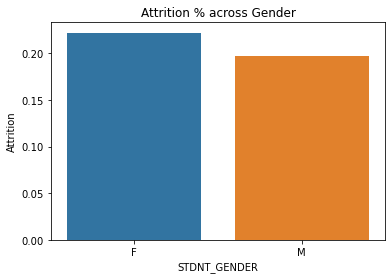

In [385]:
# To get attrition rates between genders
gender_att_crosstab = pd.crosstab(df['STDNT_GENDER'],df['Target'],normalize='index')

sns.barplot(x=pd.crosstab(df['STDNT_GENDER'],df['Target'],normalize='index').index,
            y=gender_att_crosstab[1])
plt.ylabel("Attrition")
plt.title("Attrition % across Gender")

## Student Background

In [386]:
df['STDNT_BACKGROUND'].value_counts()
# Most of them are from BGD 1

BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: STDNT_BACKGROUND, dtype: int64

In [387]:
pd.crosstab(index=df['STDNT_BACKGROUND'],columns=df['Target'],normalize='index')
# Students from BGD 5 have equal chance of attrition, however we cannot confirm this as there are only 8 students from this background

Target,0,1
STDNT_BACKGROUND,,
BGD 1,0.770893,0.229107
BGD 2,0.773585,0.226415
BGD 3,0.820486,0.179514
BGD 4,0.812950,0.187050
BGD 5,0.500000,0.500000
BGD 6,0.851064,0.148936
BGD 7,0.631579,0.368421
BGD 8,0.800000,0.200000


Text(0.5, 1.0, 'Attrition % across Background')

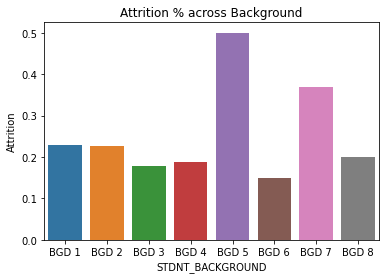

In [388]:
# Attrition rates across different backgrounds
sns.barplot(x=pd.crosstab(index=df['STDNT_BACKGROUND'],columns=df['Target'],normalize='index').index,
           y=pd.crosstab(index=df['STDNT_BACKGROUND'],columns=df['Target'],normalize='index')[1])
plt.ylabel("Attrition")
plt.title("Attrition % across Background")

<AxesSubplot:xlabel='STDNT_BACKGROUND', ylabel='count'>

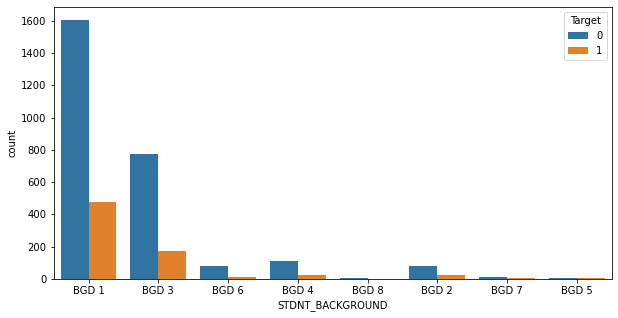

In [389]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='STDNT_BACKGROUND',hue=df['Target'])
# lot of students are from BGD1, attrition is also more in BGD 1

In [390]:
df.pivot_table(index=['Target'],columns=['STDNT_BACKGROUND','STDNT_GENDER'],values='STUDENT IDENTIFIER',aggfunc='count')

STDNT_BACKGROUND  BGD 1        BGD 2        BGD 3        BGD 4       BGD 5  \
STDNT_GENDER          F      M     F     M      F      M     F     M     F   
Target                                                                       
0                 948.0  657.0  47.0  35.0  554.0  223.0  61.0  52.0   1.0   
1                 295.0  182.0  15.0   9.0  124.0   46.0  23.0   3.0   3.0   

STDNT_BACKGROUND      BGD 6       BGD 7      BGD 8       
STDNT_GENDER        M     F     M     F    M     F    M  
Target                                                   
0                 3.0  40.0  40.0  11.0  1.0   3.0  1.0  
1                 1.0   9.0   5.0   6.0  1.0   NaN  1.0

array([<AxesSubplot:title={'center':'(BGD 1, F)'}, xlabel='Target'>,
       <AxesSubplot:title={'center':'(BGD 1, M)'}, xlabel='Target'>,
       <AxesSubplot:title={'center':'(BGD 2, F)'}, xlabel='Target'>,
       <AxesSubplot:title={'center':'(BGD 2, M)'}, xlabel='Target'>,
       <AxesSubplot:title={'center':'(BGD 3, F)'}, xlabel='Target'>,
       <AxesSubplot:title={'center':'(BGD 3, M)'}, xlabel='Target'>,
       <AxesSubplot:title={'center':'(BGD 4, F)'}, xlabel='Target'>,
       <AxesSubplot:title={'center':'(BGD 4, M)'}, xlabel='Target'>,
       <AxesSubplot:title={'center':'(BGD 5, F)'}, xlabel='Target'>,
       <AxesSubplot:title={'center':'(BGD 5, M)'}, xlabel='Target'>,
       <AxesSubplot:title={'center':'(BGD 6, F)'}, xlabel='Target'>,
       <AxesSubplot:title={'center':'(BGD 6, M)'}, xlabel='Target'>,
       <AxesSubplot:title={'center':'(BGD 7, F)'}, xlabel='Target'>,
       <AxesSubplot:title={'center':'(BGD 7, M)'}, xlabel='Target'>,
       <AxesSubplot:title={'center

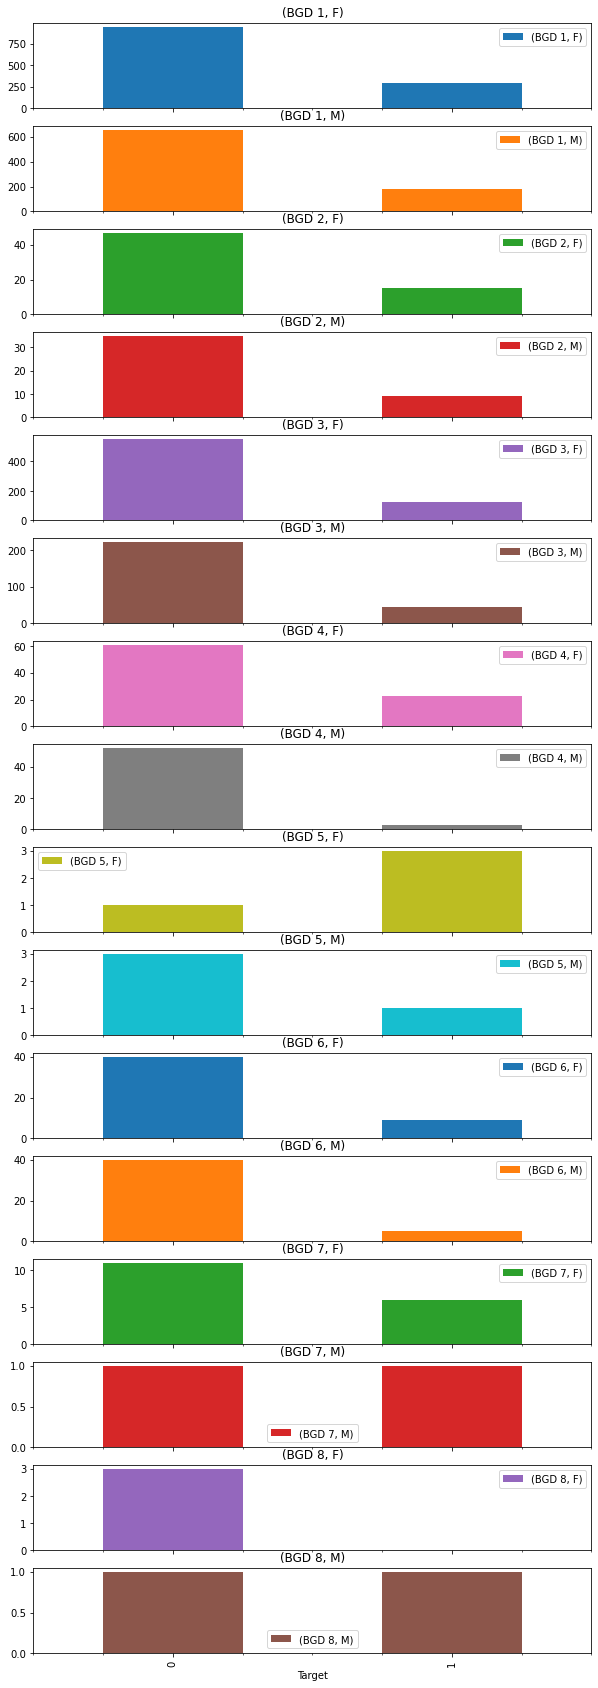

In [391]:
# Attrition across both background and gender
df.pivot_table(index=['Target'],columns=['STDNT_BACKGROUND','STDNT_GENDER'],values='STUDENT IDENTIFIER',aggfunc='count').plot(kind='bar',subplots=True,sharex=True,figsize=(10,30))

## IN_STATE_FLAG

In [392]:
df['IN_STATE_FLAG'].value_counts(normalize=True)
# Most of the students are from the same state as university, naturally.

Y    0.900882
N    0.099118
Name: IN_STATE_FLAG, dtype: float64

In [393]:
pd.crosstab(df['IN_STATE_FLAG'],df['Target'],normalize='index')
# Attrition is more for students that are not from the same state

Target,0,1
IN_STATE_FLAG,,
N,0.735905,0.264095
Y,0.793013,0.206987


<AxesSubplot:xlabel='IN_STATE_FLAG', ylabel='Count'>

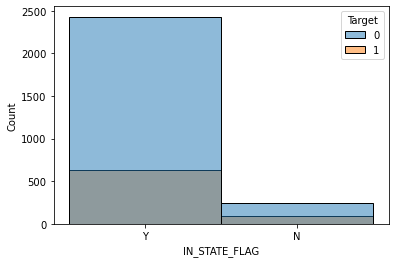

In [394]:
sns.histplot(data=df, x='IN_STATE_FLAG', hue='Target', stat='count')

Text(0.5, 1.0, 'Attrition % of students in and outside the state')

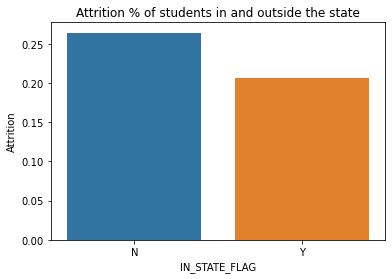

In [395]:
sns.barplot(x=pd.crosstab(df['IN_STATE_FLAG'],df['Target'],normalize='index').index,
           y=pd.crosstab(df['IN_STATE_FLAG'],df['Target'],normalize='index')[1])
plt.ylabel("Attrition")
plt.title("Attrition % of students in and outside the state")

## International status

In [396]:
df['INTERNATIONAL_STS'].value_counts()
# Very slim number of students are international

N    3373
Y      27
Name: INTERNATIONAL_STS, dtype: int64

In [397]:
pd.crosstab(df['INTERNATIONAL_STS'],df['Target'])

Target,0,1
INTERNATIONAL_STS,,
N,2662,711
Y,15,12


Text(0.5, 1.0, 'count of int students w.r.t attrition')

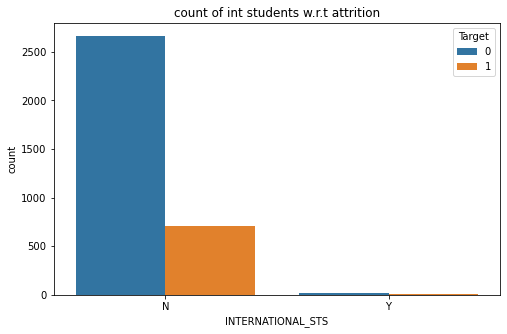

In [398]:
plt.figure(figsize=(8,5))

sns.countplot(data=df,x='INTERNATIONAL_STS',hue='Target')
plt.title('count of int students w.r.t attrition')
# Many are from the state and many have left the course
# This variable may be insignificant due to the very low number of international students

Text(0.5, 1.0, 'Attrition % of int and non-int students')

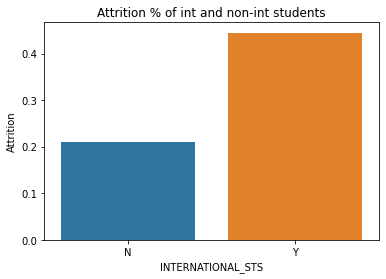

In [399]:
sns.barplot(x=pd.crosstab(df['INTERNATIONAL_STS'],df['Target'],normalize='index').index,
           y=pd.crosstab(df['INTERNATIONAL_STS'],df['Target'],normalize='index')[1])
plt.ylabel("Attrition")
plt.title("Attrition % of int and non-int students")

## Student major

In [400]:
df['STDNT_MAJOR'].value_counts()
# Many of the students have not declared their majors

Undeclared                        460
Biology                           362
Early Childhood Education         190
Pre-Nursing                       177
Nursing                           164
Psychology                        155
Pre-Business                      133
Theatre Arts                      131
Music Performance                  99
Criminal Justice                   98
Music Education                    96
General Business                   85
Exercise Science                   81
Art                                75
Management                         72
Communication                      70
Chemistry                          64
Political Science                  64
English Language/Literature        60
Engineering Studies                60
Marketing                          59
Computer Science - Systems         58
Accounting                         54
Health Science                     48
Computer Science - Games           40
Joint Enrollment - Accel           35
History     

In [401]:
pd.crosstab(df['STDNT_MAJOR'],df['Target'])

Target,0,1
STDNT_MAJOR,,
Accounting,42,12
Applied Computer Science,27,5
Art,57,18
Art Education,7,2
Biology,280,82
Biology and Secondary Ed,2,3
Chemistry,54,10
Chemistry and Secondary Ed,2,0
Communication,56,14


<AxesSubplot:xlabel='count', ylabel='STDNT_MAJOR'>

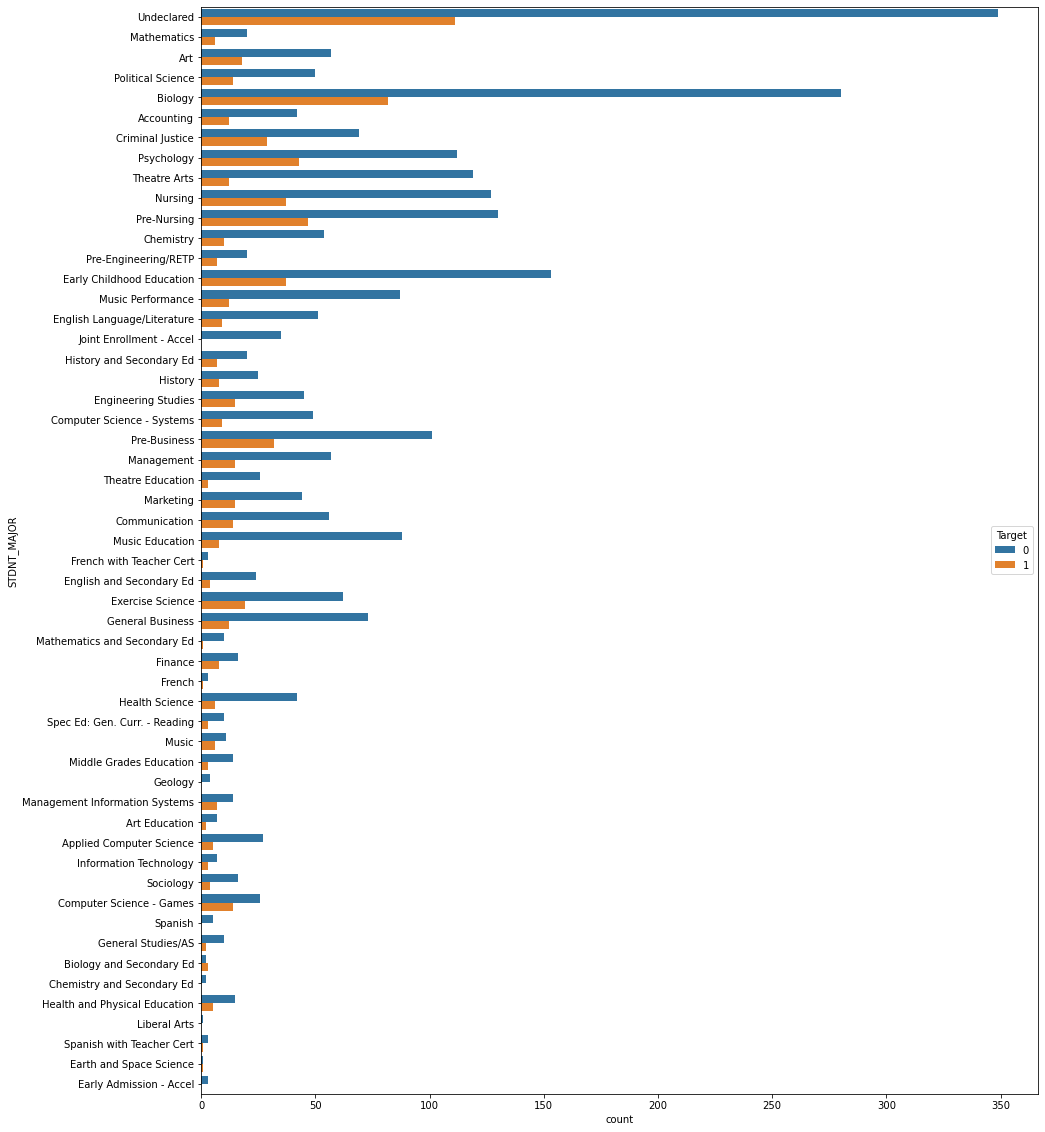

In [402]:
plt.figure(figsize=(15,20))
sns.countplot(data=df,y='STDNT_MAJOR',hue='Target')

## Student minor

In [403]:
df['STDNT_MINOR'].value_counts(normalize=True)*100
# 93% of the students have no minors

N                                92.941176
Spanish                           0.764706
Music                             0.558824
Psychology                        0.558824
Foundations of Business           0.441176
Communication                     0.411765
History                           0.382353
Criminal Justice                  0.352941
Theatre Arts                      0.352941
Computer Science - Systems        0.294118
Early Childhood Education         0.264706
Mathematics                       0.205882
Art History                       0.176471
Professional Writing              0.176471
Marketing                         0.176471
Sociology                         0.147059
English Language/Literature       0.147059
Art                               0.147059
Biology                           0.117647
Accounting                        0.117647
Chemistry                         0.117647
French                            0.117647
Political Science                 0.117647
Economics  

In [404]:
pd.crosstab(df['STDNT_MINOR'],df['Target'])
# We can ignore this feature

Target,0,1
STDNT_MINOR,,
Accounting,3,1
African Studies,2,0
Anthropology,2,0
Art,3,2
Art History,4,2
Asian Studies,2,0
Biology,3,1
Chemistry,4,0
Communication,13,1


## Entrance test

In [405]:
df[['STDNT_TEST_ENTRANCE1','STDNT_TEST_ENTRANCE2','STDNT_TEST_ENTRANCE_COMB']].isnull().sum()
# Both Entrance 1&2 have large number of missing values.
# Hence we should only consider the combined test variable 

STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
dtype: int64

<AxesSubplot:xlabel='STDNT_TEST_ENTRANCE_COMB', ylabel='Density'>

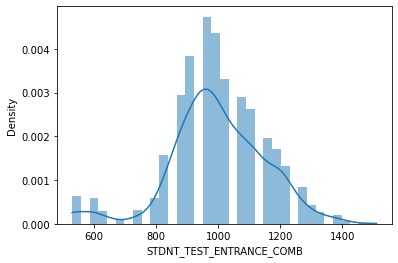

In [406]:
sns.histplot(df['STDNT_TEST_ENTRANCE_COMB'],kde=True, stat="density", linewidth=0)

Text(0.5, 1.0, 'Count of STDNT_TEST_ENTRANCE_COMB group w.r.t Attrition')

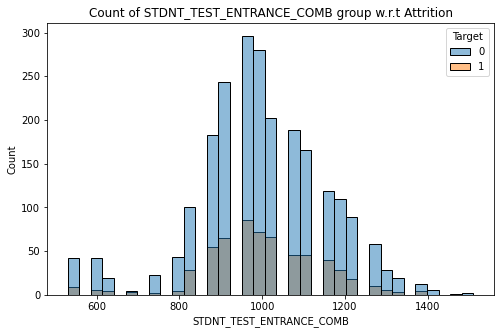

In [407]:
plt.figure(figsize=(8,5))

sns.histplot(data=df,x='STDNT_TEST_ENTRANCE_COMB',hue='Target')
plt.title('Count of STDNT_TEST_ENTRANCE_COMB group w.r.t Attrition')

<AxesSubplot:xlabel='STDNT_TEST_ENTRANCE_COMB'>

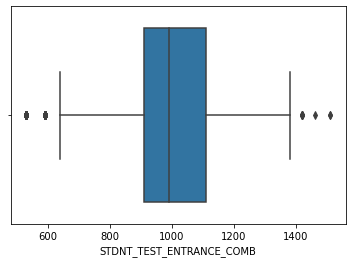

In [408]:
sns.boxplot(data=df,x='STDNT_TEST_ENTRANCE_COMB')
# There are outliers in this variable

## First Term

In [409]:
df['FIRST_TERM'].value_counts()
# It has values ranging from the year 2005-2010

200908    676
201008    632
200808    581
200708    521
200608    497
200508    493
Name: FIRST_TERM, dtype: int64

In [410]:
pd.crosstab(df['FIRST_TERM'],df['Target'],normalize='index')*100
# Attrition increses as we move away from the year 2006

Target,0,1
FIRST_TERM,,
200508,78.498986,21.501014
200608,84.305835,15.694165
200708,78.694818,21.305182
200808,77.280551,22.719449
200908,76.923077,23.076923
201008,77.848101,22.151899


## Couse names & Course grades

In [411]:
df[['CORE_COURSE_NAME_1_F',
 'CORE_COURSE_GRADE_1_F',
 'CORE_COURSE_NAME_2_F',
 'CORE_COURSE_GRADE_2_F',
 'CORE_COURSE_NAME_3_F',
 'CORE_COURSE_GRADE_3_F',
 'CORE_COURSE_NAME_4_F',
 'CORE_COURSE_GRADE_4_F',
 'CORE_COURSE_NAME_5_F',
 'CORE_COURSE_GRADE_5_F',
 'CORE_COURSE_NAME_6_F',
 'CORE_COURSE_GRADE_6_F',]].isnull().sum()
# We can't keep most of the variables 

CORE_COURSE_NAME_1_F        0
CORE_COURSE_GRADE_1_F       0
CORE_COURSE_NAME_2_F       99
CORE_COURSE_GRADE_2_F      99
CORE_COURSE_NAME_3_F      565
CORE_COURSE_GRADE_3_F     565
CORE_COURSE_NAME_4_F     1597
CORE_COURSE_GRADE_4_F    1597
CORE_COURSE_NAME_5_F     2755
CORE_COURSE_GRADE_5_F    2755
CORE_COURSE_NAME_6_F     3272
CORE_COURSE_GRADE_6_F    3272
dtype: int64

In [412]:
df[['CORE_COURSE_NAME_1_F',
 'CORE_COURSE_GRADE_1_F',
 'CORE_COURSE_NAME_2_F',
 'CORE_COURSE_GRADE_2_F',
 'CORE_COURSE_NAME_3_F',
 'CORE_COURSE_GRADE_3_F',
 'CORE_COURSE_NAME_4_F',
 'CORE_COURSE_GRADE_4_F',
 'CORE_COURSE_NAME_5_F',
 'CORE_COURSE_GRADE_5_F',
 'CORE_COURSE_NAME_6_F',
 'CORE_COURSE_GRADE_6_F',]].head()
# We can think of keeping the grades and dropping the course names

,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_GRADE_6_F
0,ANTH 1105,A,ARTH 1100,A,ENGL 1102,A,PSYC 1101,A,NaN,NaN,NaN,NaN
1,ANTH 1105,A,GERM 1002,A,ITDS 2735,A,MATH 1125,A,THEA 1100,A,POLS 1101,A
2,ANTH 1105,A,ENGL 1101,A,HIST 2111,A,MATH 1111,A,SOCI 1101,A,NaN,NaN
3,ANTH 1107,A,COMM 1110,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANTH 1107,A,ARTH 1100,A,CPSC 1105,A,MATH 1111,A,NaN,NaN,NaN,NaN


In [413]:
pd.concat([df['CORE_COURSE_GRADE_1_F'],
   df['CORE_COURSE_GRADE_2_F'],
   df['CORE_COURSE_GRADE_3_F'],
   df['CORE_COURSE_GRADE_4_F'],
   df['CORE_COURSE_GRADE_5_F'],
   df['CORE_COURSE_GRADE_6_F']]).value_counts(dropna=False)

NaN        8288
B          4100
A          3905
C          2402
D           966
F           595
NOT REP     109
INCOMPL      35
dtype: int64

## Second Term

In [414]:
df['SECOND_TERM'].value_counts()
# It has values ranging from the year 2006-2010

201002    676
201102    632
200902    581
200802    521
200702    497
200602    493
Name: SECOND_TERM, dtype: int64

In [415]:
pd.crosstab(df['SECOND_TERM'],df['Target'],normalize='index')*100
# Attrition increases as we move away from 2007

Target,0,1
SECOND_TERM,,
200602,78.498986,21.501014
200702,84.305835,15.694165
200802,78.694818,21.305182
200902,77.280551,22.719449
201002,76.923077,23.076923
201102,77.848101,22.151899


## Course names & Course grades

In [416]:
df[['CORE_COURSE_NAME_1_S',
 'CORE_COURSE_GRADE_1_S',
 'CORE_COURSE_NAME_2_S',
 'CORE_COURSE_GRADE_2_S',
 'CORE_COURSE_NAME_3_S',
 'CORE_COURSE_GRADE_3_S',
 'CORE_COURSE_NAME_4_S',
 'CORE_COURSE_GRADE_4_S',
 'CORE_COURSE_NAME_5_S',
 'CORE_COURSE_GRADE_5_S',
 'CORE_COURSE_NAME_6_S',
 'CORE_COURSE_GRADE_6_S']].isnull().sum()
# Most of these variables are unusable
# We can think of dropping them all together or getting just the grades like we did in first term

CORE_COURSE_NAME_1_S      157
CORE_COURSE_GRADE_1_S     232
CORE_COURSE_NAME_2_S      439
CORE_COURSE_GRADE_2_S     439
CORE_COURSE_NAME_3_S     1038
CORE_COURSE_GRADE_3_S    1038
CORE_COURSE_NAME_4_S     2045
CORE_COURSE_GRADE_4_S    2045
CORE_COURSE_NAME_5_S     2950
CORE_COURSE_GRADE_5_S    2950
CORE_COURSE_NAME_6_S     3319
CORE_COURSE_GRADE_6_S    3319
dtype: int64

## Housing status

In [417]:
df['HOUSING_STS'].value_counts()
# More number of students staying outside campus

Off Campus    1981
On Campus     1419
Name: HOUSING_STS, dtype: int64

In [418]:
pd.crosstab(df['HOUSING_STS'],df['Target'],normalize='index')*100

Target,0,1
HOUSING_STS,,
Off Campus,80.363453,19.636547
On Campus,76.462297,23.537703


Text(0.5, 1.0, 'Students housing status w.r.t attrition')

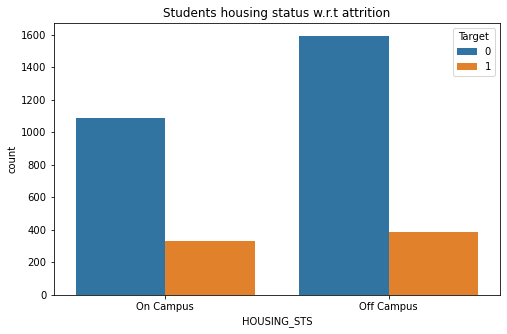

In [419]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x=df['HOUSING_STS'],hue=df['Target'])
plt.title("Students housing status w.r.t attrition")

Text(0.5, 1.0, 'Attrition % w.r.t housing status')

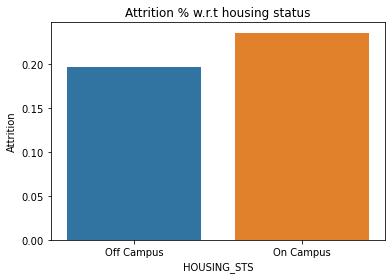

In [420]:
sns.barplot(x=pd.crosstab(df['HOUSING_STS'],df['Target'],normalize='index').index,
           y=pd.crosstab(df['HOUSING_STS'],df['Target'],normalize='index')[1])
plt.ylabel("Attrition")
plt.title("Attrition % w.r.t housing status")

In [421]:
# Creating a variable to see the attrition rates across housing status and gender
house_gen_pivot = df.pivot_table(index='Target', columns=['HOUSING_STS','STDNT_GENDER'], values='STUDENT IDENTIFIER', aggfunc='count')

for x in ['Off Campus','On Campus']:
    for y in ['F','M']:
        for z in [0,1]:
            house_gen_pivot.loc[z,(x,y)] = round((house_gen_pivot[x][y][z]/house_gen_pivot[x][y].sum())*100,2)
        
house_gen_pivot

HOUSING_STS  Off Campus        On Campus       
STDNT_GENDER          F      M         F      M
Target                                         
0                 79.69  81.31     75.58  78.44
1                 74.68  65.45     76.05  54.51

Text(0.5, 1.0, 'Attrition % across gender and housing status')

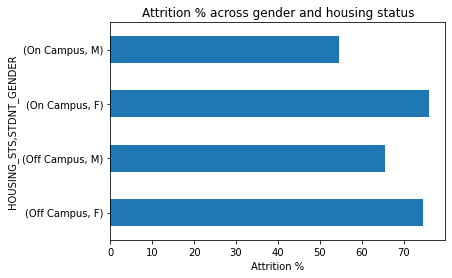

In [422]:
house_gen_pivot.loc[1,:].plot(kind='barh')
plt.xlabel("Attrition %")
plt.title("Attrition % across gender and housing status")

## Distance from home

<AxesSubplot:xlabel='DISTANCE_FROM_HOME', ylabel='Density'>

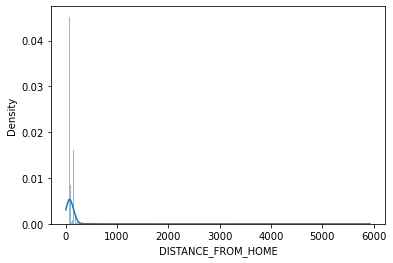

In [423]:
sns.histplot(df['DISTANCE_FROM_HOME'],kde=True, stat="density", linewidth=0)
# Most of the values are within 1000

<AxesSubplot:xlabel='DISTANCE_FROM_HOME'>

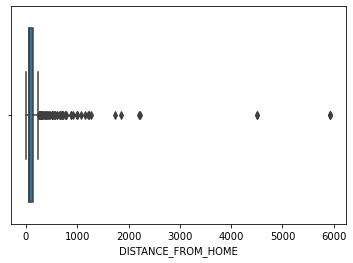

In [424]:
sns.boxplot(data=df,x='DISTANCE_FROM_HOME')
# There are outliers

<AxesSubplot:xlabel='DISTANCE_FROM_HOME', ylabel='Count'>

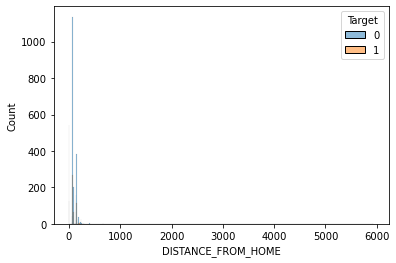

In [425]:
sns.histplot(data=df,x='DISTANCE_FROM_HOME',hue='Target')

## High school GPA

In [426]:
df['HIGH_SCHL_GPA'].describe()

count    3347.000000
mean        3.202738
std         0.455337
min         0.000000
25%         2.870000
50%         3.200000
75%         3.560000
max         4.000000
Name: HIGH_SCHL_GPA, dtype: float64

<AxesSubplot:xlabel='HIGH_SCHL_GPA', ylabel='Density'>

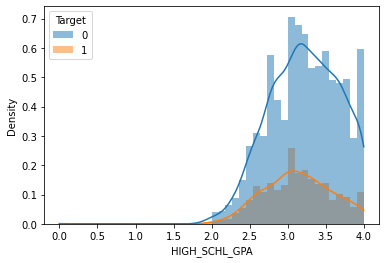

In [427]:
sns.histplot(data=df,
             x='HIGH_SCHL_GPA',
             kde=True, stat="density",
             linewidth=0,
             color="red",
             hue='Target')
# Attrition seems to be proportional to high school GPA

## High school name

In [428]:
df['HIGH_SCHL_NAME'].value_counts()
# The names are in some sort of order 

SCHOOL 11     249
SCHOOL 130    245
SCHOOL 10     238
SCHOOL 1      209
SCHOOL 2      129
             ... 
SCHOOL 197      1
SCHOOL 524      1
SCHOOL 415      1
SCHOOL 495      1
SCHOOL 378      1
Name: HIGH_SCHL_NAME, Length: 439, dtype: int64

In [429]:
df['HIGH_SCHL_NAME'].nunique()
# 439 high schools

439

## Father's education

In [430]:
df['FATHER_HI_EDU_CD'].value_counts(dropna=False)

2.0    1336
3.0    1309
NaN     432
4.0     226
1.0      97
Name: FATHER_HI_EDU_CD, dtype: int64

In [431]:
df['FATHER_HI_EDU_DESC'].value_counts(dropna=False)
# Since they both are giving the same information, one of them is redundant
# We can remove any one of them 

High School                  1336
College/Beyond               1309
No Information                432
Other/Unknown                 226
Middle School/Junior High      97
Name: FATHER_HI_EDU_DESC, dtype: int64

In [432]:
df['FATHER_HI_EDU_DESC'].isnull().sum()

0

In [433]:
pd.crosstab(df['FATHER_HI_EDU_DESC'],df['Target'],normalize='index')*100
# Attrition is less for students whose fathers have college education

Target,0,1
FATHER_HI_EDU_DESC,,
College/Beyond,80.366692,19.633308
High School,78.368263,21.631737
Middle School/Junior High,73.195876,26.804124
No Information,76.157407,23.842593
Other/Unknown,78.761062,21.238938


Text(0.5, 1.0, "Attrition % w.r.t Father's education")

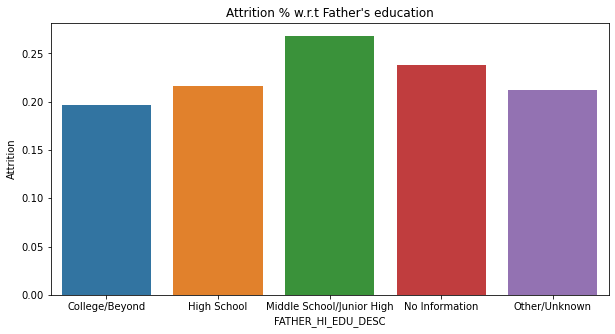

In [434]:
plt.figure(figsize=(10,5))
sns.barplot(x=pd.crosstab(df['FATHER_HI_EDU_DESC'],df['Target'],normalize='index').index,
           y=pd.crosstab(df['FATHER_HI_EDU_DESC'],df['Target'],normalize='index')[1])
plt.ylabel("Attrition")
plt.title("Attrition % w.r.t Father's education")

## Mother's education

In [435]:
df['MOTHER_HI_EDU_CD'].value_counts()

3.0    1500
2.0    1223
4.0     117
1.0      71
Name: MOTHER_HI_EDU_CD, dtype: int64

In [436]:
df['MOTHER_HI_EDU_DESC'].value_counts()
# It is the same as in father's education
# We can keep one of them 

College/Beyond               1500
High School                  1223
No Information                489
Other/Unknown                 117
Middle School/Junior High      71
Name: MOTHER_HI_EDU_DESC, dtype: int64

In [437]:
pd.crosstab(df['MOTHER_HI_EDU_DESC'],df['Target'],normalize='index')
# Doesn't show any particular pattern

Target,0,1
MOTHER_HI_EDU_DESC,,
College/Beyond,0.799333,0.200667
High School,0.783320,0.216680
Middle School/Junior High,0.774648,0.225352
No Information,0.748466,0.251534
Other/Unknown,0.846154,0.153846


## Degree enrolled in 

In [438]:
df['DEGREE_GROUP_CD'].value_counts()

B    3384
A      12
V       4
Name: DEGREE_GROUP_CD, dtype: int64

In [439]:
df['DEGREE_GROUP_DESC'].value_counts()
# We can drop one of them 

Bachelors           3384
Associate             12
Career Associate       4
Name: DEGREE_GROUP_DESC, dtype: int64

In [440]:
pd.crosstab(df['DEGREE_GROUP_DESC'],df['Target'])
# Most of the students are enrolled in Bachelors and most of the attrition is from Bachelors

Target,0,1
DEGREE_GROUP_DESC,,
Associate,10,2
Bachelors,2664,720
Career Associate,3,1


## Attempt vs Earned

In [441]:
df[['FIRST_TERM_ATTEMPT_HRS','FIRST_TERM_EARNED_HRS']].isnull().sum()

FIRST_TERM_ATTEMPT_HRS    0
FIRST_TERM_EARNED_HRS     0
dtype: int64

In [442]:
df[['SECOND_TERM_ATTEMPT_HRS','SECOND_TERM_EARNED_HRS']].isnull().sum()
# We can use the difference between them to know how much student has fallen short same with second term
# Or we can divide them to get corresponding year's performance

SECOND_TERM_ATTEMPT_HRS    206
SECOND_TERM_EARNED_HRS     209
dtype: int64

## Financial need

<AxesSubplot:xlabel='GROSS_FIN_NEED', ylabel='Count'>

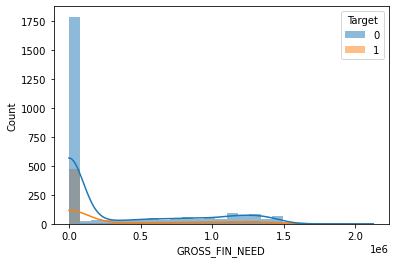

In [443]:
sns.histplot(data=df,x='GROSS_FIN_NEED',kde='True',linewidth=0,hue='Target')

## Course fees

<AxesSubplot:xlabel='COST_OF_ATTEND', ylabel='Count'>

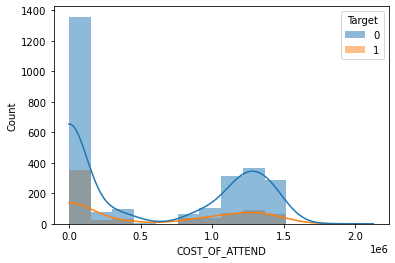

In [444]:
sns.histplot(data=df,x='COST_OF_ATTEND',kde='True',linewidth=0,hue='Target')

## Family contribution

<AxesSubplot:xlabel='EST_FAM_CONTRIBUTION', ylabel='Count'>

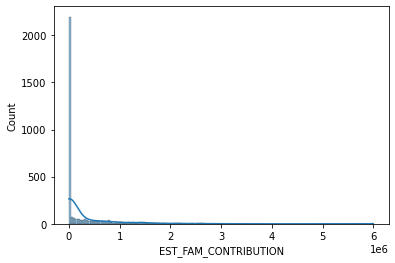

In [445]:
sns.histplot(data=df,x='EST_FAM_CONTRIBUTION',kde='True')

## Unmet needs

<AxesSubplot:xlabel='UNMET_NEED', ylabel='Count'>

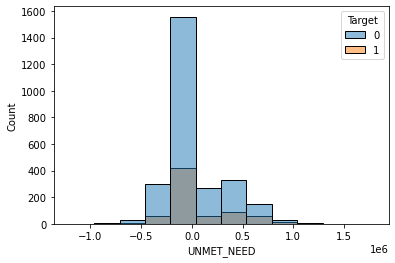

In [446]:
sns.histplot(data=df,x='UNMET_NEED', binwidth=250000, stat='count', hue='Target')
# Unmet needs is a combination of course fees and family contribution
# So we can think of dropping the rest two features for this one

# Feature engineering

In [447]:
columns_to_remove = ['STUDENT IDENTIFIER', #since it serves no purpose
                    'STDNT_TEST_ENTRANCE1', #since both entrance 1&2 have large missing values
                    'STDNT_TEST_ENTRANCE2', #and since the same information is captured in the combined variable
                    'FATHER_HI_EDU_CD', #redundant as FATHER_HI_EDU_DESC serves the same purpose
                    'MOTHER_HI_EDU_CD', #redundant as MOTHER_HI_EDU_DESC serves the same purpose
                    'DEGREE_GROUP_CD', #redundant as same information is captured in DEGREE_GROUP_DESC
                    'GROSS_FIN_NEED'] #same information is captured in UNMET_NEED
df.drop(columns_to_remove,axis=1,inplace=True)
df.columns

Index(['STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND', 'IN_STATE_FLAG',
       'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR',
       'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'CORE_COURSE_NAME_1_F',
       'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
       'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_4_F',
       'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_NAME_5_F',
       'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_NAME_6_F',
       'CORE_COURSE_GRADE_6_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_NAME_3_S',
       'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_NAME_4_S',
       'CORE_COURSE_GRADE_4_S', 'CORE_COURSE_NAME_5_S',
       'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_NAME_6_S',
       'CORE_COURSE_GRADE_6_S', 'HOUSING_STS', 'DISTANCE_FROM_HOME',
       'HIGH_SCHL_GPA', 'HIGH_SCHL_NAME', 'FATHER_HI_EDU_DESC',
       'MOTHER_HI_EDU_DESC', 'DE

In [448]:
# Student major is largely dominated by undeclared class
# We can do statistical test to decide whether to remove this variable or not
# Chi square association test
from scipy.stats import chi2_contingency

# H0 : There is no association between student major and target
# H1 : There is association between student major and target

observation = pd.crosstab(df['STDNT_MAJOR'],df['Target'])

chi2, p, dof, ex = chi2_contingency(observation, correction=True)

# alpha = 0.05
# If p-value < alpha we reject null hypothesis
# If p-value > alpha we accept null hypothesis

print(p)
# We reject null hypothesis
# There is association between the variables, we can think of one-hot encoding student major

0.002281570927520086


In [449]:
# Student minor is largely dominated by N
# We can do chi-square to know if the variable is significant or not

# H0 : There is no association between student minor and target
# H1 : There is association between student minor and target

observation = pd.crosstab(df['STDNT_MINOR'],df['Target'])

chi2, p, dof, ex = chi2_contingency(observation, correction=True)

# alpha = 0.05
# If p-value < alpha we reject null hypothesis
# If p-value > alpha we accept null hypothesis

print(p)
# We accept null hypothesis
# We can drop this column since it has no association with the target variable

0.5562124183770998


In [450]:
df[['FIRST_TERM','SECOND_TERM']].head()

# since every students goes through the same 6 months in a term
# We can remove any one of the term - SECOND TERM
# We can also convert the values to just years

,FIRST_TERM,SECOND_TERM
0,200708,200802
1,200808,200902
2,201008,201102
3,200708,200802
4,200808,200902


In [451]:
# We can create new columns for capturing the performance of students each term

df['FIRST_TERM_PERF'] = df['FIRST_TERM_EARNED_HRS']/df['FIRST_TERM_ATTEMPT_HRS']
df['SECOND_TERM_PERF'] = df['SECOND_TERM_EARNED_HRS']/df['SECOND_TERM_ATTEMPT_HRS']

# Now we can drop attempted & earned columns

<AxesSubplot:>

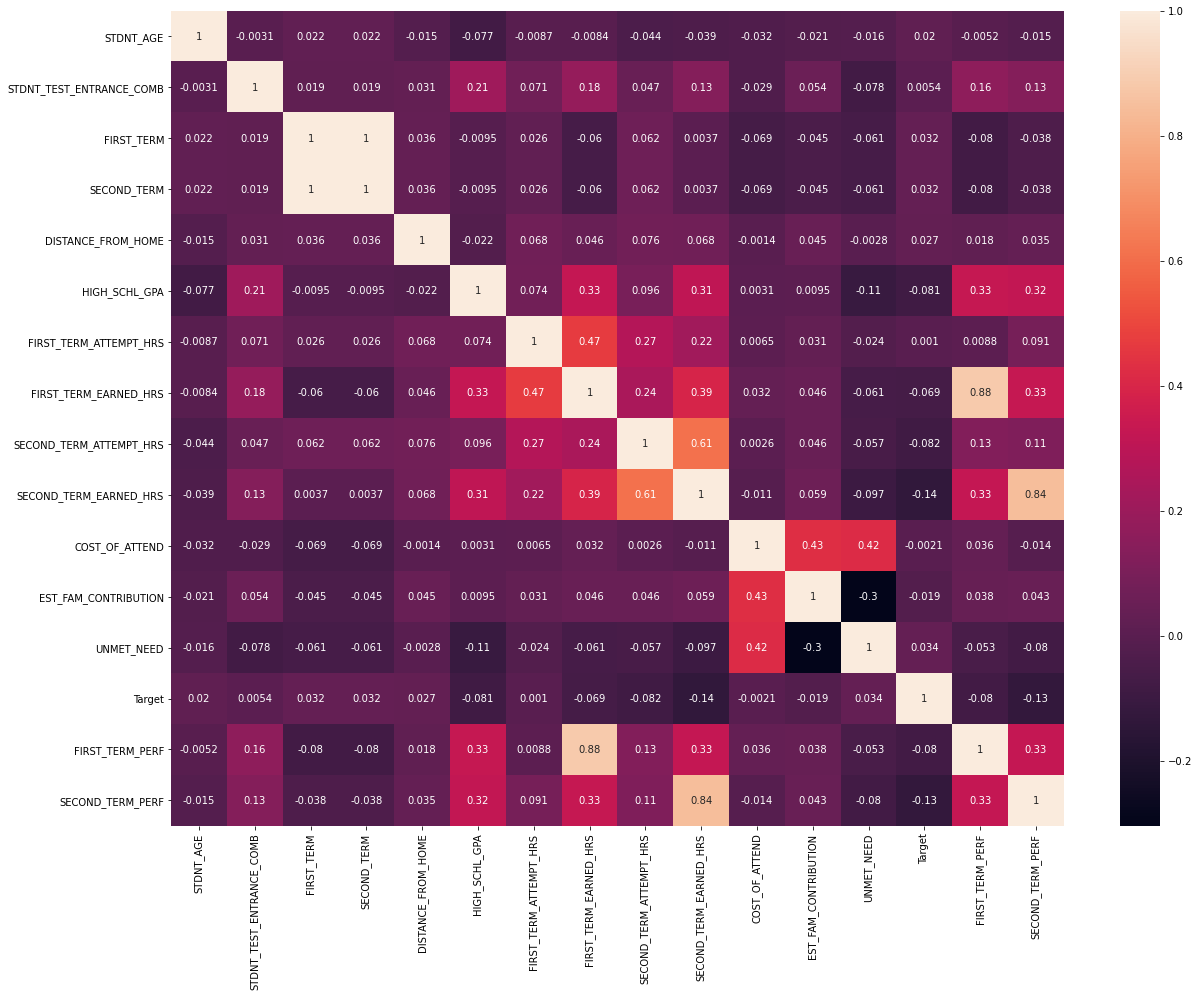

In [452]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

# There is slightly high correlation between COST_OF_ATTEND and (EST_FAM_CONTRIBUTION,UNMET_NEED)
# We can think of dropping COST_OF_ATTEND

In [453]:
# The majority of course names & grades have missing values
# We can drop all courses other than the corse course opted as 1

columns_to_drop = ['STDNT_MINOR',
                  'CORE_COURSE_NAME_2_F',
                  'CORE_COURSE_GRADE_2_F',
                  'CORE_COURSE_NAME_3_F',
                  'CORE_COURSE_GRADE_3_F',
                  'CORE_COURSE_NAME_4_F',
                  'CORE_COURSE_GRADE_4_F',
                  'CORE_COURSE_NAME_5_F',
                  'CORE_COURSE_GRADE_5_F',
                  'CORE_COURSE_NAME_6_F',
                  'CORE_COURSE_GRADE_6_F',
                  'SECOND_TERM',
                  'CORE_COURSE_NAME_3_S',
                  'CORE_COURSE_NAME_2_S',
                  'CORE_COURSE_GRADE_2_S',
                  'CORE_COURSE_GRADE_3_S',
                  'CORE_COURSE_NAME_4_S',
                  'CORE_COURSE_GRADE_4_S',
                  'CORE_COURSE_NAME_5_S',
                  'CORE_COURSE_GRADE_5_S',
                  'CORE_COURSE_NAME_6_S',
                  'CORE_COURSE_GRADE_6_S',
                  'FIRST_TERM_ATTEMPT_HRS',
                  'FIRST_TERM_EARNED_HRS',
                  'SECOND_TERM_ATTEMPT_HRS',
                  'SECOND_TERM_EARNED_HRS',
                  'COST_OF_ATTEND']

df.drop(columns_to_drop,axis=1,inplace=True)

In [454]:
df.isnull().sum()
# Now we can start taking care of missing values

STDNT_AGE                     0
STDNT_GENDER                  0
STDNT_BACKGROUND              0
IN_STATE_FLAG                 0
INTERNATIONAL_STS             0
STDNT_MAJOR                   0
STDNT_TEST_ENTRANCE_COMB    518
FIRST_TERM                    0
CORE_COURSE_NAME_1_F          0
CORE_COURSE_GRADE_1_F         0
CORE_COURSE_NAME_1_S        157
CORE_COURSE_GRADE_1_S       232
HOUSING_STS                   0
DISTANCE_FROM_HOME           25
HIGH_SCHL_GPA                53
HIGH_SCHL_NAME                1
FATHER_HI_EDU_DESC            0
MOTHER_HI_EDU_DESC            0
DEGREE_GROUP_DESC             0
EST_FAM_CONTRIBUTION          0
UNMET_NEED                    0
Target                        0
FIRST_TERM_PERF               0
SECOND_TERM_PERF            209
dtype: int64

In [455]:
df['STDNT_TEST_ENTRANCE_COMB'].describe()

count    2882.000000
mean      997.758501
std       156.268221
min       530.000000
25%       910.000000
50%       990.000000
75%      1110.000000
max      1510.000000
Name: STDNT_TEST_ENTRANCE_COMB, dtype: float64

<AxesSubplot:>

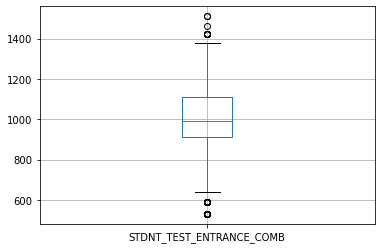

In [456]:
df.boxplot(column='STDNT_TEST_ENTRANCE_COMB')

In [457]:
# We can impute the missing values with mean

df['STDNT_TEST_ENTRANCE_COMB'].fillna(df['STDNT_TEST_ENTRANCE_COMB'].mean(),inplace=True)

In [458]:
# We can keep just the year part of first term

df['FIRST_TERM'] = df['FIRST_TERM'].map(lambda x: str(x)[:4])
df['FIRST_TERM'].head()

0    2007
1    2008
2    2010
3    2007
4    2008
Name: FIRST_TERM, dtype: object

In [459]:
# Since the count of missing values in itself is pretty high
# We can create a label of its own as non-graded (NG)

courses = ['CORE_COURSE_NAME_1_S',
         'CORE_COURSE_GRADE_1_S']

df[courses] = df[courses].fillna('NG')
df['CORE_COURSE_GRADE_1_S'].value_counts()

C          906
B          896
D          501
F          421
A          366
NG         232
NOT REP     47
INCOMPL     26
Unknown      5
Name: CORE_COURSE_GRADE_1_S, dtype: int64

In [460]:
# We can impute the missing values with mean and the mode for categorical variables

df['DISTANCE_FROM_HOME'] = df['DISTANCE_FROM_HOME'].fillna(df['DISTANCE_FROM_HOME'].mean())
df['HIGH_SCHL_GPA'] = df['HIGH_SCHL_GPA'].fillna(df['HIGH_SCHL_GPA'].mean())
df['HIGH_SCHL_NAME'] = df['HIGH_SCHL_NAME'].fillna('SCHOOL 11')

In [461]:
# The missing values in second performance maybe due to people dropping off
# So we can impute them with 0 

df['SECOND_TERM_PERF'] = df['SECOND_TERM_PERF'].fillna(0)

In [462]:
df.isnull().sum().sum()

# There is no null values in the dataset.

0

In [463]:
# We should scale the values since they are inherently on different scales
# The performance variables values are around 0-1 scale unlike rest of the features
# We can seperate out the target variable and start feature scaling on rest of the values

y = df['Target']
df.drop('Target',axis=1,inplace=True)

num_col = [col for col in df.columns if df[col].dtype in ['int64','float64']]
num_col

['STDNT_AGE',
 'STDNT_TEST_ENTRANCE_COMB',
 'DISTANCE_FROM_HOME',
 'HIGH_SCHL_GPA',
 'EST_FAM_CONTRIBUTION',
 'UNMET_NEED',
 'FIRST_TERM_PERF',
 'SECOND_TERM_PERF']

In [464]:
# Using min-max scaling to bring everything to the same scale

from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
scaled_data = scale.fit_transform(df[num_col])
df[num_col] = pd.DataFrame(scaled_data,columns=num_col)
df[num_col]

,STDNT_AGE,STDNT_TEST_ENTRANCE_COMB,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,EST_FAM_CONTRIBUTION,UNMET_NEED,FIRST_TERM_PERF,SECOND_TERM_PERF
0,0.2,0.632653,0.025287,1.0000,0.000000,0.426076,0.750000,0.947368
1,0.3,0.673469,0.011632,0.7225,0.130961,0.587532,0.750000,0.947368
2,0.2,0.510204,0.025287,0.8475,0.000000,0.426076,0.750000,0.947368
3,0.2,0.704082,0.025287,0.7325,0.000000,0.426076,0.750000,0.947368
4,0.2,0.673469,0.011632,0.9650,0.086641,0.523920,0.750000,0.947368
...,...,...,...,...,...,...,...,...
3395,0.2,0.265306,0.146831,0.9825,0.000000,0.426076,0.750000,0.769737
3396,0.2,0.428571,0.011632,0.6725,0.000000,0.426076,0.519231,0.000000
3397,0.2,0.510204,0.015172,0.6900,0.214832,0.426076,0.321429,0.000000
3398,0.2,0.469388,0.000000,0.8900,0.000000,0.344620,0.562500,0.000000


In [465]:
# First we check the cardinality of categorical columns, then decide what to do with it.

cat_col = [col for col in df.columns if df[col].dtype=='object']
card_col = {col:df[col].nunique() for col in df[cat_col].columns}
card_col

{'STDNT_GENDER': 2,
 'STDNT_BACKGROUND': 8,
 'IN_STATE_FLAG': 2,
 'INTERNATIONAL_STS': 2,
 'STDNT_MAJOR': 54,
 'FIRST_TERM': 6,
 'CORE_COURSE_NAME_1_F': 69,
 'CORE_COURSE_GRADE_1_F': 7,
 'CORE_COURSE_NAME_1_S': 67,
 'CORE_COURSE_GRADE_1_S': 9,
 'HOUSING_STS': 2,
 'HIGH_SCHL_NAME': 439,
 'FATHER_HI_EDU_DESC': 5,
 'MOTHER_HI_EDU_DESC': 5,
 'DEGREE_GROUP_DESC': 3}

In [466]:
# Course names have series of numbers attached to the names 
# This makes the variable have high cardinality
# We can treat this by just keeping names and removing the numbers

course_names = ['CORE_COURSE_NAME_1_F',
               'CORE_COURSE_NAME_1_S',]

df[course_names] = df[course_names].applymap(lambda x: x[:4])

In [467]:
# There are 439 unique values in high school names
# The values are in some order representing each school as 1,2,3 etc.
# The grades column is also an ordinal variable
# So we can ordinal encode these variables

from sklearn.preprocessing import OrdinalEncoder

ord_enc_col = ['HIGH_SCHL_NAME',
               'CORE_COURSE_GRADE_1_F',
               'CORE_COURSE_GRADE_1_S',]

ordinal_encoder = OrdinalEncoder()
df[ord_enc_col] = ordinal_encoder.fit_transform(df[ord_enc_col])

In [468]:
# There are 54 categories in student major this could impede progress in modeling stage

df.drop('STDNT_MAJOR', axis=1, inplace=True)

In [469]:
# Checking the cardinality of the variables

cat_col = [col for col in df.columns if df[col].dtype=='object']
card_col = {col:df[col].nunique() for col in df[cat_col].columns}
card_col

{'STDNT_GENDER': 2,
 'STDNT_BACKGROUND': 8,
 'IN_STATE_FLAG': 2,
 'INTERNATIONAL_STS': 2,
 'FIRST_TERM': 6,
 'CORE_COURSE_NAME_1_F': 27,
 'CORE_COURSE_NAME_1_S': 25,
 'HOUSING_STS': 2,
 'FATHER_HI_EDU_DESC': 5,
 'MOTHER_HI_EDU_DESC': 5,
 'DEGREE_GROUP_DESC': 3}

In [470]:
# Now we can one-hot encode the rest of them 
# After much modeling it was evident that these features was just noise
# Did the modelling with all these features which amounted to 200 features after one-hot encoding and without it
# Witnessed no performance improvement hence dropping the noise

X = pd.get_dummies(df).drop(['CORE_COURSE_NAME_1_F_ANTH', 'CORE_COURSE_NAME_1_F_ARAB',
       'CORE_COURSE_NAME_1_F_ARTH', 'CORE_COURSE_NAME_1_F_ASTR',
       'CORE_COURSE_NAME_1_F_BIOL', 'CORE_COURSE_NAME_1_F_CHEM',
       'CORE_COURSE_NAME_1_F_COMM', 'CORE_COURSE_NAME_1_F_CPSC',
       'CORE_COURSE_NAME_1_F_ECON', 'CORE_COURSE_NAME_1_F_ENGL',
       'CORE_COURSE_NAME_1_F_ENVS', 'CORE_COURSE_NAME_1_F_FREN',
       'CORE_COURSE_NAME_1_F_GEOG', 'CORE_COURSE_NAME_1_F_GEOL',
       'CORE_COURSE_NAME_1_F_GERM', 'CORE_COURSE_NAME_1_F_HIST',
       'CORE_COURSE_NAME_1_F_ITDS', 'CORE_COURSE_NAME_1_F_LEAD',
       'CORE_COURSE_NAME_1_F_MATH', 'CORE_COURSE_NAME_1_F_MUSC',
       'CORE_COURSE_NAME_1_F_PHYS', 'CORE_COURSE_NAME_1_F_POLS',
       'CORE_COURSE_NAME_1_F_PSYC', 'CORE_COURSE_NAME_1_F_SOCI',
       'CORE_COURSE_NAME_1_F_SPAN', 'CORE_COURSE_NAME_1_F_STAT',
       'CORE_COURSE_NAME_1_F_THEA', 'CORE_COURSE_NAME_1_S_ANTH',
       'CORE_COURSE_NAME_1_S_ARTH', 'CORE_COURSE_NAME_1_S_ASTR',
       'CORE_COURSE_NAME_1_S_BIOL', 'CORE_COURSE_NAME_1_S_CHEM',
       'CORE_COURSE_NAME_1_S_COMM', 'CORE_COURSE_NAME_1_S_CPSC',
        'CORE_COURSE_NAME_1_S_ENGL',
       'CORE_COURSE_NAME_1_S_ENVS', 'CORE_COURSE_NAME_1_S_FREN',
       'CORE_COURSE_NAME_1_S_GEOG', 'CORE_COURSE_NAME_1_S_GEOL',
       'CORE_COURSE_NAME_1_S_HIST', 'CORE_COURSE_NAME_1_S_ITDS',
       'CORE_COURSE_NAME_1_S_MATH', 'CORE_COURSE_NAME_1_S_MUSC',
        'CORE_COURSE_NAME_1_S_PHYS', 'CORE_COURSE_NAME_1_S_ECON',
       'CORE_COURSE_NAME_1_S_POLS', 'CORE_COURSE_NAME_1_S_PSYC',
       'CORE_COURSE_NAME_1_S_SOCI','CORE_COURSE_NAME_1_S_SPAN',
       'CORE_COURSE_NAME_1_S_STAT', 'CORE_COURSE_NAME_1_S_THEA',
       'CORE_COURSE_NAME_1_F_SPAN'],axis=1)
X.shape

(3400, 47)

# Model Selection

In [471]:
# Splitting data for training and testing

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X,y,
                                                  test_size=0.2,
                                                  stratify=y,
                                                  random_state=69)

In [472]:
# Creating a function to make the process of training and scoring seamless

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score

def score_model(model, xtrain=xtrain, xtest=xtest, ytrain=ytrain, ytest=ytest):
    model.fit(xtrain,ytrain)
    score = cross_val_score(model, xtrain, ytrain, cv=5, n_jobs = -1)
    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)
    ypred_proba = model.predict_proba(xtest)[:,1]
    cm = confusion_matrix(ytest,y_test_pred)

    print("Train accuracy: ",accuracy_score(ytrain,y_train_pred))
    print("Cross validation accuracy: ", score.mean(),"\n")
    print("Confusion matrix:\n ",cm,"\n")
    print("Classification report:\n",classification_report(ytest,y_test_pred))
    print("ROC AUC score: ",roc_auc_score(ytest,ypred_proba))

## Logistic Regression

In [473]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
score_model(lr)

C:\Users\Jobin\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Train accuracy:  0.8297794117647059
Cross validation accuracy:  0.8297794117647058 

Confusion matrix:
  [[520  15]
 [106  39]] 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       535
           1       0.72      0.27      0.39       145

    accuracy                           0.82       680
   macro avg       0.78      0.62      0.64       680
weighted avg       0.81      0.82      0.79       680

ROC AUC score:  0.708849500483403


In [474]:
imp_feat = lr.coef_[0]
imp_dict = {i:v for i,v in sorted(enumerate(imp_feat),key=lambda x: x[1],reverse=True)}
list(imp_dict.items())[:5]

[(31, 0.7262070273848938),
 (13, 0.33431480616780024),
 (3, 0.29491422844446175),
 (28, 0.17081660370999568),
 (21, 0.1520741203549656)]

In [475]:
 xtrain.iloc[:,31].head()

1634    0
1496    0
2960    0
1863    0
153     0
Name: CORE_COURSE_NAME_1_S_NG, dtype: uint8

## Random forest

In [476]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
score_model(rfc)

Train accuracy:  1.0
Cross validation accuracy:  0.83125 

Confusion matrix:
  [[524  11]
 [104  41]] 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       535
           1       0.79      0.28      0.42       145

    accuracy                           0.83       680
   macro avg       0.81      0.63      0.66       680
weighted avg       0.82      0.83      0.80       680

ROC AUC score:  0.6947985820174024


## Gradient boosting

In [477]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
score_model(gbc)

Train accuracy:  0.8599264705882353
Cross validation accuracy:  0.8257352941176471 

Confusion matrix:
  [[522  13]
 [101  44]] 

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       535
           1       0.77      0.30      0.44       145

    accuracy                           0.83       680
   macro avg       0.80      0.64      0.67       680
weighted avg       0.82      0.83      0.80       680

ROC AUC score:  0.7238478891395425


## ADA boost

In [478]:
from sklearn.ensemble import AdaBoostClassifier

adbc = AdaBoostClassifier()
score_model(adbc)

Train accuracy:  0.8408088235294118
Cross validation accuracy:  0.8275735294117647 

Confusion matrix:
  [[519  16]
 [101  44]] 

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       535
           1       0.73      0.30      0.43       145

    accuracy                           0.83       680
   macro avg       0.79      0.64      0.66       680
weighted avg       0.81      0.83      0.80       680

ROC AUC score:  0.7074057363841443


## XGBoost

In [479]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False)
score_model(xgb)

[12:12:11] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy:  0.9863970588235295
Cross validation accuracy:  0.8073529411764706 

Confusion matrix:
  [[501  34]
 [101  44]] 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       535
           1       0.56      0.30      0.39       145

    accuracy                           0.80       680
   macro avg       0.70      0.62      0.64       680
weighted avg       0.78      0.80      0.78       680

ROC AUC score:  0.6753722204318401


## Stats Logistic regression

In [480]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Splitting the data into training and test
df['Target'] = y
df_train = df.sample(frac=0.7, random_state=69)
df_test = df.drop(df_train.index)

# Initializing the model
stat_lr = smf.glm("Target~C(STDNT_GENDER)+C(STDNT_BACKGROUND)+STDNT_TEST_ENTRANCE_COMB+CORE_COURSE_GRADE_1_F+CORE_COURSE_GRADE_1_S+C(CORE_COURSE_NAME_1_F)+C(CORE_COURSE_NAME_1_S)+DISTANCE_FROM_HOME+HIGH_SCHL_GPA+UNMET_NEED+FIRST_TERM_PERF+SECOND_TERM_PERF",
                 data = df_train,
                 family = sm.families.Binomial()).fit()

print(stat_lr.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                 2380
Model:                            GLM   Df Residuals:                     2313
Model Family:                Binomial   Df Model:                           66
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1042.8
Date:                Sat, 04 Dec 2021   Deviance:                       2085.6
Time:                        12:12:12   Pearson chi2:                 2.41e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [481]:
# Variables that needs to be retained
# STDNT_MAJOR - Biology and Secondary Ed, Theatre Arts
# CORE_COURSE_NAME_1_F - CPSC, ECON, PSYC, SOCI, SPAN, 
# CORE_COURSE_NAME_1_S - NG

# df_train["STDNT_MAJOR_BIO_SEC"] = df_train["STDNT_MAJOR"].map(lambda x: 1 if x=="Biology and Secondary Ed" else 0)
# df_test["STDNT_MAJOR_BIO_SEC"] = df_test["STDNT_MAJOR"].map(lambda x: 1 if x=="Biology and Secondary Ed" else 0)

# df_train["STDNT_THEA_ARTS"] = df_train["STDNT_MAJOR"].map(lambda x: 1 if x=="Theatre Arts" else 0)
# df_test["STDNT_THEA_ARTS"] = df_test["STDNT_MAJOR"].map(lambda x: 1 if x=="Theatre Arts" else 0)

df_train["CORE_COURSE_NAME_1_F_CPSC"] = df_train["CORE_COURSE_NAME_1_F"].map(lambda x: 1 if x=="CPSC" else 0)
df_test["CORE_COURSE_NAME_1_F_CPSC"] = df_test["CORE_COURSE_NAME_1_F"].map(lambda x: 1 if x=="CPSC" else 0)

df_train["CORE_COURSE_NAME_1_F_ECON"] = df_train["CORE_COURSE_NAME_1_F"].map(lambda x: 1 if x=="ECON" else 0)
df_test["CORE_COURSE_NAME_1_F_ECON"] = df_test["CORE_COURSE_NAME_1_F"].map(lambda x: 1 if x=="ECON" else 0)

df_train["CORE_COURSE_NAME_1_F_PSYC"] = df_train["CORE_COURSE_NAME_1_F"].map(lambda x: 1 if x=="PSYC" else 0)
df_test["CORE_COURSE_NAME_1_F_PSYC"] = df_test["CORE_COURSE_NAME_1_F"].map(lambda x: 1 if x=="PSYC" else 0)

df_train["CORE_COURSE_NAME_1_F_SOCI"] = df_train["CORE_COURSE_NAME_1_F"].map(lambda x: 1 if x=="SOCI" else 0)
df_test["CORE_COURSE_NAME_1_F_SOCI"] = df_test["CORE_COURSE_NAME_1_F"].map(lambda x: 1 if x=="SOCI" else 0)

df_train["CORE_COURSE_NAME_1_F_SPAN"] = df_train["CORE_COURSE_NAME_1_F"].map(lambda x: 1 if x=="SPAN" else 0)
df_test["CORE_COURSE_NAME_1_F_SPAN"] = df_test["CORE_COURSE_NAME_1_F"].map(lambda x: 1 if x=="SPAN" else 0)

df_train["CORE_COURSE_NAME_1_S_NG"] = df_train["CORE_COURSE_NAME_1_S"].map(lambda x: 1 if x=="NG" else 0)
df_test["CORE_COURSE_NAME_1_S_NG"] = df_test["CORE_COURSE_NAME_1_S"].map(lambda x: 1 if x=="NG" else 0)

df_train["STDNT_BACKGROUND_BGD_3"] = df_train["STDNT_BACKGROUND"].map(lambda x: 1 if x=="BGD 3" else 0)
df_test["STDNT_BACKGROUND_BGD_3"] = df_test["STDNT_BACKGROUND"].map(lambda x: 1 if x=="BGD 3" else 0)

In [482]:
stat_lr = smf.glm("Target~C(STDNT_GENDER)+STDNT_BACKGROUND_BGD_3+STDNT_TEST_ENTRANCE_COMB+CORE_COURSE_GRADE_1_F+CORE_COURSE_GRADE_1_S+CORE_COURSE_NAME_1_F_ECON+CORE_COURSE_NAME_1_F_SPAN+CORE_COURSE_NAME_1_S_NG+DISTANCE_FROM_HOME+FIRST_TERM_PERF+SECOND_TERM_PERF",
                 data = df_train,
                 family = sm.families.Binomial()).fit()

print(stat_lr.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                 2380
Model:                            GLM   Df Residuals:                     2368
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1061.1
Date:                Sat, 04 Dec 2021   Deviance:                       2122.2
Time:                        12:12:13   Pearson chi2:                 2.42e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [483]:
# scoring the model 
ytrue = df_test['Target']
ypred = stat_lr.predict(df_test).map(lambda x:1 if x>0.5 else 0)

print(confusion_matrix(ytrue,ypred))
print(classification_report(ytrue,ypred))

[[797  16]
 [147  60]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       813
           1       0.79      0.29      0.42       207

    accuracy                           0.84      1020
   macro avg       0.82      0.64      0.67      1020
weighted avg       0.83      0.84      0.81      1020



## Support vector machines

In [484]:
from sklearn.svm import SVC

svc = SVC(kernel = 'sigmoid')

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)

print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[438  97]
 [107  38]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       535
           1       0.28      0.26      0.27       145

    accuracy                           0.70       680
   macro avg       0.54      0.54      0.54       680
weighted avg       0.69      0.70      0.70       680



## KNN

In [485]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
score_model(knn)

Train accuracy:  0.8341911764705883
Cross validation accuracy:  0.788235294117647 

Confusion matrix:
  [[505  30]
 [116  29]] 

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       535
           1       0.49      0.20      0.28       145

    accuracy                           0.79       680
   macro avg       0.65      0.57      0.58       680
weighted avg       0.74      0.79      0.75       680

ROC AUC score:  0.660592974540767


## Decision Tree

In [486]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
score_model(dtc)

Train accuracy:  1.0
Cross validation accuracy:  0.7187500000000001 

Confusion matrix:
  [[427 108]
 [ 86  59]] 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       535
           1       0.35      0.41      0.38       145

    accuracy                           0.71       680
   macro avg       0.59      0.60      0.60       680
weighted avg       0.73      0.71      0.72       680

ROC AUC score:  0.6025136964228166


# Hyperparameter Tuning promising models
## Random Forest

In [487]:
# Manual Tuning

rfc = RandomForestClassifier(
    n_estimators=200,
    criterion='entropy',
    max_depth=4,
    max_samples=0.8,
    max_features=0.6,
    bootstrap=True,
    random_state=69
)

score_model(rfc)

Train accuracy:  0.8360294117647059
Cross validation accuracy:  0.8327205882352942 

Confusion matrix:
  [[527   8]
 [108  37]] 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       535
           1       0.82      0.26      0.39       145

    accuracy                           0.83       680
   macro avg       0.83      0.62      0.65       680
weighted avg       0.83      0.83      0.79       680

ROC AUC score:  0.7176023203351596


In [488]:
# Using randomsearchcv to tune

from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier()
param_grid = {'n_estimators':np.arange(100,400,10),
             'criterion':['gini','entropy'],
             'bootstrap':[True,False],
             'max_depth':np.arange(1,8)}

rf_rand_search = RandomizedSearchCV(estimator = rfc,
                                   param_distributions = param_grid,
                                   n_jobs = -1,
                                   cv = 5,
                                   n_iter=50)
rf_rand_search.fit(xtrain,ytrain)

print(rf_rand_search.best_params_)
# {'n_estimators': 160, 'max_depth': 7, 'criterion': 'entropy', 'bootstrap': False}

rfc = RandomForestClassifier(**rf_rand_search.best_params_)
score_model(rfc)

{'n_estimators': 300, 'max_depth': 6, 'criterion': 'gini', 'bootstrap': False}
Train accuracy:  0.8422794117647059
Cross validation accuracy:  0.8334558823529413 

Confusion matrix:
  [[525  10]
 [108  37]] 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       535
           1       0.79      0.26      0.39       145

    accuracy                           0.83       680
   macro avg       0.81      0.62      0.64       680
weighted avg       0.82      0.83      0.79       680

ROC AUC score:  0.7199742184982275


In [489]:
# Optimizing with optuna we got 
# 'n_estimators': 208, 'criterion': 'entropy', 'max_depth': 2, 'max_samples': 0.10430952267350968

rf = RandomForestClassifier(n_estimators=208,
                            criterion='entropy',
                            max_depth=2,
                            max_samples=0.100)

score_model(rf)

Train accuracy:  0.8136029411764706
Cross validation accuracy:  0.8165441176470589 

Confusion matrix:
  [[531   4]
 [124  21]] 

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89       535
           1       0.84      0.14      0.25       145

    accuracy                           0.81       680
   macro avg       0.83      0.57      0.57       680
weighted avg       0.82      0.81      0.75       680

ROC AUC score:  0.7144183048662585


In [490]:
# optimizing with hyperopt we got
# 'bootstrap': True, 'criterion': 'gini', 'max_depth': 2.0, 'n_estimators': 108.0

rf = RandomForestClassifier(
    n_estimators = 205,
    criterion = 'gini',
    max_depth = 6,
)
score_model(rf)

Train accuracy:  0.8408088235294118
Cross validation accuracy:  0.8316176470588236 

Confusion matrix:
  [[526   9]
 [108  37]] 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       535
           1       0.80      0.26      0.39       145

    accuracy                           0.83       680
   macro avg       0.82      0.62      0.64       680
weighted avg       0.82      0.83      0.79       680

ROC AUC score:  0.7191105381888495


## Logistic Regression

In [491]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

param_grid = {
    'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
    'max_iter':[100, 500, 700, 1000]
    }

lr_grid = GridSearchCV(lr,
                      param_grid =  param_grid,
                      cv = 5,
                      verbose = 2,
                      n_jobs=-1)

lr_grid.fit(xtrain,ytrain)

print(lr_grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'max_iter': 100, 'solver': 'lbfgs'}


C:\Users\Jobin\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [492]:
# The best solver is the default one

lr = LogisticRegression(solver='lbfgs')
score_model(lr)

Train accuracy:  0.8297794117647059
Cross validation accuracy:  0.8297794117647058 

Confusion matrix:
  [[520  15]
 [106  39]] 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       535
           1       0.72      0.27      0.39       145

    accuracy                           0.82       680
   macro avg       0.78      0.62      0.64       680
weighted avg       0.81      0.82      0.79       680

ROC AUC score:  0.708849500483403


C:\Users\Jobin\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Gradient Boosting

In [493]:
# Using randomized search
GB = GradientBoostingClassifier()

param_grid = {'n_estimators':[i for i in np.arange(10,700,10)],
             'learning_rate':[i for i in np.arange(0.001,2,0.05)]}

GB_rand = RandomizedSearchCV(GB,
                            param_distributions=param_grid,
                            cv=5,
                            verbose=2,
                            n_jobs=-1,
                            n_iter=10)
GB_rand.fit(xtrain,ytrain)

print(GB_rand.best_params_)

GB = GradientBoostingClassifier(**GB_rand.best_params_)
score_model(GB)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 210, 'learning_rate': 0.051000000000000004}
Train accuracy:  0.8580882352941176
Cross validation accuracy:  0.8261029411764707 

Confusion matrix:
  [[521  14]
 [103  42]] 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       535
           1       0.75      0.29      0.42       145

    accuracy                           0.83       680
   macro avg       0.79      0.63      0.66       680
weighted avg       0.82      0.83      0.80       680

ROC AUC score:  0.7258072832742507


In [494]:
GB = GradientBoostingClassifier(n_estimators = 400,
                                learning_rate= 0.01)
score_model(GB)

Train accuracy:  0.8404411764705882
Cross validation accuracy:  0.8305147058823531 

Confusion matrix:
  [[527   8]
 [107  38]] 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       535
           1       0.83      0.26      0.40       145

    accuracy                           0.83       680
   macro avg       0.83      0.62      0.65       680
weighted avg       0.83      0.83      0.79       680

ROC AUC score:  0.7327360618756042


In [495]:
# Using optuna
# 'n_estimators': 27, 'learning_rate': 0.1797699772964399, 'loss': 'deviance', 'max_depth': 1

GB = GradientBoostingClassifier(
    n_estimators=27,
    learning_rate=0.179,
    loss="deviance",
    max_depth=1
)
score_model(GB)

Train accuracy:  0.8341911764705883
Cross validation accuracy:  0.8341911764705883 

Confusion matrix:
  [[527   8]
 [107  38]] 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       535
           1       0.83      0.26      0.40       145

    accuracy                           0.83       680
   macro avg       0.83      0.62      0.65       680
weighted avg       0.83      0.83      0.79       680

ROC AUC score:  0.7248469223332259


In [496]:
# using hyperopt
# 'learning_rate': 0.1402464562819304, 'loss': 'exponential', 'max_depth': 2.0, 'n_estimators': 12.0
GB = GradientBoostingClassifier(
    n_estimators=12,
    learning_rate=0.14,
    loss='exponential',
    max_depth=2
)
score_model(GB)

Train accuracy:  0.8345588235294118
Cross validation accuracy:  0.8330882352941178 

Confusion matrix:
  [[527   8]
 [109  36]] 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       535
           1       0.82      0.25      0.38       145

    accuracy                           0.83       680
   macro avg       0.82      0.62      0.64       680
weighted avg       0.83      0.83      0.79       680

ROC AUC score:  0.7126973896229455


## Ada Boost

In [497]:
# Manual tuning

adb = AdaBoostClassifier(
    learning_rate=0.43
)

score_model(adb)

Train accuracy:  0.836764705882353
Cross validation accuracy:  0.8323529411764706 

Confusion matrix:
  [[527   8]
 [104  41]] 

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.90       535
           1       0.84      0.28      0.42       145

    accuracy                           0.84       680
   macro avg       0.84      0.63      0.66       680
weighted avg       0.84      0.84      0.80       680

ROC AUC score:  0.7254527876248791


In [498]:
# Using randomsearch

param_grid = {
    "n_estimators": np.arange(50,700,50),
    "learning_rate": np.linspace(0.01,3,10)
}

rand_search = RandomizedSearchCV(
    AdaBoostClassifier(),
    param_distributions=param_grid,
    n_jobs=-1,
    cv=5,
    verbose=2,
    n_iter=10
)

rand_search.fit(xtrain, ytrain)
print(rand_search.best_params_)

adb = AdaBoostClassifier(**rand_search.best_params_)
score_model(adb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 250, 'learning_rate': 0.01}
Train accuracy:  0.8338235294117647
Cross validation accuracy:  0.8338235294117646 

Confusion matrix:
  [[527   8]
 [107  38]] 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       535
           1       0.83      0.26      0.40       145

    accuracy                           0.83       680
   macro avg       0.83      0.62      0.65       680
weighted avg       0.83      0.83      0.79       680

ROC AUC score:  0.7138897840799228


## XGboost

In [499]:
model = XGBClassifier(objective='binary:logistic')
model.fit(xtrain, ytrain, verbose=True, early_stopping_rounds=20, eval_metric='auc', eval_set=[(xtest, ytest)])

[0]	validation_0-auc:0.69598
[1]	validation_0-auc:0.70061
[2]	validation_0-auc:0.71107
[3]	validation_0-auc:0.72418
[4]	validation_0-auc:0.72840
[5]	validation_0-auc:0.72721
[6]	validation_0-auc:0.72951
[7]	validation_0-auc:0.72394
[8]	validation_0-auc:0.72331
[9]	validation_0-auc:0.72271
[10]	validation_0-auc:0.71788
[11]	validation_0-auc:0.70783
[12]	validation_0-auc:0.70508
[13]	validation_0-auc:0.71151
[14]	validation_0-auc:0.70725
[15]	validation_0-auc:0.70636
[16]	validation_0-auc:0.70083
[17]	validation_0-auc:0.69917
[18]	validation_0-auc:0.69680
[19]	validation_0-auc:0.69396
[20]	validation_0-auc:0.69445
[21]	validation_0-auc:0.69647
[22]	validation_0-auc:0.69693
[23]	validation_0-auc:0.69682
[24]	validation_0-auc:0.69851
[25]	validation_0-auc:0.70006


C:\Users\Jobin\miniconda3\envs\minimal_ds\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [500]:
ypred = model.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest, ypred))
print(roc_auc_score(ytest, ypred))

[[519  16]
 [101  44]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       535
           1       0.73      0.30      0.43       145

    accuracy                           0.83       680
   macro avg       0.79      0.64      0.66       680
weighted avg       0.81      0.83      0.80       680

0.6367708669029971


In [501]:
# Tuning using grid search
param_grid = {
    "max_depth": [2, 3, 4, 5],
    "learning_rate": [0.1, 0.2, 0.3],
    "gamma": [0.1, 0.5, 0.7],
    "reg_lambda": [10, 12, 15],
    # note: XGboost recommends sum(negative)/sum(positive)
    "scale_pos_weight": [1,3,5]
}

optimal_params = GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic',
                            subsample=0.9, colsample_bytree=0.7),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs=-1,
    cv=5
)
optimal_params.fit(xtrain, ytrain, early_stopping_rounds=20,
                   eval_metric='auc', eval_set=[(xtest, ytest)], verbose=False)
print(optimal_params.best_params_)


{'gamma': 0.7, 'learning_rate': 0.3, 'max_depth': 2, 'reg_lambda': 15, 'scale_pos_weight': 1}


C:\Users\Jobin\miniconda3\envs\minimal_ds\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



In [502]:
score_model(optimal_params.best_estimator_)

[12:13:51] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy:  0.8433823529411765
Cross validation accuracy:  0.8264705882352942 

Confusion matrix:
  [[519  16]
 [102  43]] 

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       535
           1       0.73      0.30      0.42       145

    accuracy                           0.83       680
   macro avg       0.78      0.63      0.66       680
weighted avg       0.81      0.83      0.80       680

ROC AUC score:  0.7087979374798582


In [503]:
# Tuning with Optuna
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

def optimize(trial):
    
    reg_alpha = trial.suggest_uniform("reg_alpha", 0, 6)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    min_child_weight = trial.suggest_int("min_child_weight", 0, 5)
    gamma = trial.suggest_uniform("gamma", 0, 4)
    learning_rate = trial.suggest_loguniform("learning_rate", 0.05, 1.5)
    colsample_bytree = trial.suggest_uniform("colsample_bytree", 0.4, 1.0)
    subsample = trial.suggest_uniform("subsample", 0.4, 1.0)
    
    model = XGBClassifier(
        max_depth = max_depth,
        learning_rate=learning_rate,
        reg_alpha=reg_alpha,
        min_child_weight=min_child_weight,
        gamma=gamma,
        colsample_bytree=colsample_bytree,
        subsample=subsample,
        eval_metric='logloss',
        use_label_encoder=False
    )

    score = cross_val_score(model, xtrain, ytrain, scoring='accuracy', cv=3)
    return -1*np.mean(score)

study = optuna.create_study(sampler=TPESampler(), direction='minimize')
study.optimize(optimize, n_trials=1000)
print(study.best_params)

# {'max_depth': 2, 'reg_alpha': 5.989542913111747, 'min_child_weight': 3, 'gamma': 0.19493498651285945, 'learning_rate': 0.8678993273070724, 'colsample_bytree': 0.5730298501544405, 'subsample': 0.9647630209741319}

[I 2021-12-04 12:13:52,012] A new study created in memory with name: no-name-4c232d8b-0cb6-4352-a101-512efde22151
[I 2021-12-04 12:13:52,388] Trial 0 finished with value: -0.8242619540764213 and parameters: {'reg_alpha': 4.093284840256527, 'max_depth': 5, 'min_child_weight': 0, 'gamma': 3.9045683979960897, 'learning_rate': 0.5818258710987281, 'colsample_bytree': 0.5704841984653853, 'subsample': 0.5005273089885298}. Best is trial 0 with value: -0.8242619540764213.
[I 2021-12-04 12:13:52,704] Trial 1 finished with value: -0.8124950815868403 and parameters: {'reg_alpha': 2.7213466335155934, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 3.3830577933940793, 'learning_rate': 0.8867019653061095, 'colsample_bytree': 0.645233887324563, 'subsample': 0.7360168692864587}. Best is trial 0 with value: -0.8242619540764213.
[I 2021-12-04 12:13:52,991] Trial 2 finished with value: -0.7827213407614555 and parameters: {'reg_alpha': 1.412774906308802, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 0.82

[I 2021-12-04 12:14:01,371] Trial 22 finished with value: -0.8330883253705745 and parameters: {'reg_alpha': 3.329533912302446, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.391092940864104, 'learning_rate': 0.06187755656147801, 'colsample_bytree': 0.9283096892960654, 'subsample': 0.9898077059047977}. Best is trial 9 with value: -0.8341912668453114.
[I 2021-12-04 12:14:01,855] Trial 23 finished with value: -0.8341912668453114 and parameters: {'reg_alpha': 2.3790856291884728, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 3.1805863995175923, 'learning_rate': 0.050596928705077406, 'colsample_bytree': 0.9033304403819411, 'subsample': 0.9121261600535209}. Best is trial 9 with value: -0.8341912668453114.
[I 2021-12-04 12:14:02,364] Trial 24 finished with value: -0.8312491430805938 and parameters: {'reg_alpha': 0.8507959530718567, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 3.20748168655349, 'learning_rate': 0.05114055752233015, 'colsample_bytree': 0.82414153519734, 'subsample': 0.87

[I 2021-12-04 12:14:12,227] Trial 45 finished with value: -0.8330883253705745 and parameters: {'reg_alpha': 4.949874316748548, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.6808482439959191, 'learning_rate': 0.05829730532067246, 'colsample_bytree': 0.9680119302980656, 'subsample': 0.7534752345531546}. Best is trial 44 with value: -0.8352942083200485.
[I 2021-12-04 12:14:12,632] Trial 46 finished with value: -0.8345583731471273 and parameters: {'reg_alpha': 4.871131271396842, 'max_depth': 4, 'min_child_weight': 0, 'gamma': 2.0046620728010924, 'learning_rate': 0.07369757766098008, 'colsample_bytree': 0.9262133012495462, 'subsample': 0.8201939994263824}. Best is trial 44 with value: -0.8352942083200485.
[I 2021-12-04 12:14:12,977] Trial 47 finished with value: -0.8323524901976533 and parameters: {'reg_alpha': 4.7559836704853495, 'max_depth': 4, 'min_child_weight': 0, 'gamma': 1.1398262232547043, 'learning_rate': 0.07489991738368737, 'colsample_bytree': 0.9216240545750441, 'subsample':

[I 2021-12-04 12:14:20,089] Trial 68 finished with value: -0.8338237549011733 and parameters: {'reg_alpha': 4.192234024133487, 'max_depth': 2, 'min_child_weight': 1, 'gamma': 0.9791814248072542, 'learning_rate': 0.08005267088618652, 'colsample_bytree': 0.9666375464824876, 'subsample': 0.7218002401622781}. Best is trial 67 with value: -0.8352946139623709.
[I 2021-12-04 12:14:20,495] Trial 69 finished with value: -0.8338237549011733 and parameters: {'reg_alpha': 3.9905275544923215, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 0.6824927572185537, 'learning_rate': 0.07317543456163753, 'colsample_bytree': 0.9302973210166787, 'subsample': 0.776911122628289}. Best is trial 67 with value: -0.8352946139623709.
[I 2021-12-04 12:14:20,886] Trial 70 finished with value: -0.8323537071246205 and parameters: {'reg_alpha': 4.302107205675832, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.7590991356781072, 'learning_rate': 0.10661193448606045, 'colsample_bytree': 0.9767981689999714, 'subsample': 

[I 2021-12-04 12:14:29,835] Trial 91 finished with value: -0.8338237549011733 and parameters: {'reg_alpha': 5.401263656691102, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.6373709965396817, 'learning_rate': 0.06630692792492376, 'colsample_bytree': 0.9994087837199639, 'subsample': 0.8039420820810341}. Best is trial 67 with value: -0.8352946139623709.
[I 2021-12-04 12:14:30,218] Trial 92 finished with value: -0.8330883253705745 and parameters: {'reg_alpha': 4.855752929681723, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 2.0174803370564938, 'learning_rate': 0.059702717241310765, 'colsample_bytree': 0.9850696988445253, 'subsample': 0.8082654805406805}. Best is trial 67 with value: -0.8352946139623709.
[I 2021-12-04 12:14:30,547] Trial 93 finished with value: -0.8330883253705745 and parameters: {'reg_alpha': 4.456887353472834, 'max_depth': 2, 'min_child_weight': 0, 'gamma': 0.8574550654048377, 'learning_rate': 0.0539914409065269, 'colsample_bytree': 0.9669289714236712, 'subsample': 

[I 2021-12-04 12:14:38,678] Trial 114 finished with value: -0.8345579675048048 and parameters: {'reg_alpha': 5.238231934445731, 'max_depth': 4, 'min_child_weight': 0, 'gamma': 1.5557986305267533, 'learning_rate': 0.07602880045659272, 'colsample_bytree': 0.9725577260466506, 'subsample': 0.7842400486490951}. Best is trial 113 with value: -0.8356625315488317.
[I 2021-12-04 12:14:38,976] Trial 115 finished with value: -0.8327208134264364 and parameters: {'reg_alpha': 5.566912900778177, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.6494944170734425, 'learning_rate': 0.06467703532376208, 'colsample_bytree': 0.7390975253395933, 'subsample': 0.6879073194500914}. Best is trial 113 with value: -0.8356625315488317.
[I 2021-12-04 12:14:39,244] Trial 116 finished with value: -0.8327208134264364 and parameters: {'reg_alpha': 5.355557390907177, 'max_depth': 2, 'min_child_weight': 1, 'gamma': 0.015289111722953885, 'learning_rate': 0.07063149897139456, 'colsample_bytree': 0.9867693175254489, 'subsa

[I 2021-12-04 12:14:47,051] Trial 137 finished with value: -0.8338229436165285 and parameters: {'reg_alpha': 4.698239231556654, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.4878978997111942, 'learning_rate': 0.07569928054723984, 'colsample_bytree': 0.9312412216746973, 'subsample': 0.6720604823419715}. Best is trial 134 with value: -0.8360292322083249.
[I 2021-12-04 12:14:47,437] Trial 138 finished with value: -0.8338233492588509 and parameters: {'reg_alpha': 4.350111855860907, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.1440414546696025, 'learning_rate': 0.08275773546787375, 'colsample_bytree': 0.965694417316733, 'subsample': 0.7068427995685626}. Best is trial 134 with value: -0.8360292322083249.
[I 2021-12-04 12:14:47,821] Trial 139 finished with value: -0.8338229436165285 and parameters: {'reg_alpha': 3.8842244038057685, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 1.7305525613352775, 'learning_rate': 0.06508786202462921, 'colsample_bytree': 0.9510497905501151, 'subsamp

[I 2021-12-04 12:14:55,347] Trial 160 finished with value: -0.8334558373147128 and parameters: {'reg_alpha': 5.814210262693013, 'max_depth': 2, 'min_child_weight': 0, 'gamma': 1.4572557552934353, 'learning_rate': 0.07183391623167588, 'colsample_bytree': 0.9946436348642264, 'subsample': 0.956207175558546}. Best is trial 134 with value: -0.8360292322083249.
[I 2021-12-04 12:14:55,735] Trial 161 finished with value: -0.83051452483464 and parameters: {'reg_alpha': 4.989903239068257, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.62301340221342, 'learning_rate': 0.1326764740420405, 'colsample_bytree': 0.9150634837185271, 'subsample': 0.7869344092152752}. Best is trial 134 with value: -0.8360292322083249.
[I 2021-12-04 12:14:56,118] Trial 162 finished with value: -0.8338233492588509 and parameters: {'reg_alpha': 4.665250127921509, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.7108562190961822, 'learning_rate': 0.07621219884578105, 'colsample_bytree': 0.8734265203605405, 'subsample': 0

[I 2021-12-04 12:15:03,737] Trial 183 finished with value: -0.8338233492588509 and parameters: {'reg_alpha': 4.49636356650785, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.5510595103749432, 'learning_rate': 0.06200604589192523, 'colsample_bytree': 0.7975020384123691, 'subsample': 0.9671062938841177}. Best is trial 134 with value: -0.8360292322083249.
[I 2021-12-04 12:15:04,074] Trial 184 finished with value: -0.8356613146218642 and parameters: {'reg_alpha': 5.051335537257119, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.5153356112506482, 'learning_rate': 0.07272989006074648, 'colsample_bytree': 0.929481671619573, 'subsample': 0.9733675571335118}. Best is trial 134 with value: -0.8360292322083249.
[I 2021-12-04 12:15:04,480] Trial 185 finished with value: -0.8338237549011733 and parameters: {'reg_alpha': 5.0135097145236855, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.6057272120613084, 'learning_rate': 0.07279021335926342, 'colsample_bytree': 0.9297562614547079, 'subsampl

[I 2021-12-04 12:15:12,776] Trial 206 finished with value: -0.8334558373147128 and parameters: {'reg_alpha': 4.822719852172898, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.8277590032922468, 'learning_rate': 0.06539084438105704, 'colsample_bytree': 0.7349321109103266, 'subsample': 0.9231905471087766}. Best is trial 193 with value: -0.8360300434929698.
[I 2021-12-04 12:15:13,169] Trial 207 finished with value: -0.8341912668453114 and parameters: {'reg_alpha': 4.931239186712068, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.6357022330209234, 'learning_rate': 0.06970462709221498, 'colsample_bytree': 0.9437049280695526, 'subsample': 0.9767024577640744}. Best is trial 193 with value: -0.8360300434929698.
[I 2021-12-04 12:15:13,634] Trial 208 finished with value: -0.8327200021417914 and parameters: {'reg_alpha': 4.517443743603188, 'max_depth': 4, 'min_child_weight': 0, 'gamma': 1.430860024774111, 'learning_rate': 0.08132180739156594, 'colsample_bytree': 0.9502786462600645, 'subsampl

[I 2021-12-04 12:15:22,405] Trial 229 finished with value: -0.8345579675048048 and parameters: {'reg_alpha': 4.101136109068001, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.0166712927073913, 'learning_rate': 0.09170118486841977, 'colsample_bytree': 0.9084968121260508, 'subsample': 0.9994249206681415}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:15:22,855] Trial 230 finished with value: -0.8356617202641868 and parameters: {'reg_alpha': 4.674745339868738, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.7785480985474077, 'learning_rate': 0.06997429174809618, 'colsample_bytree': 0.9681331605600337, 'subsample': 0.9764974799328106}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:15:23,263] Trial 231 finished with value: -0.834926290733588 and parameters: {'reg_alpha': 4.608169620280072, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.7704508462552929, 'learning_rate': 0.06995564789079273, 'colsample_bytree': 0.9218580792261895, 'subsampl

[I 2021-12-04 12:15:31,568] Trial 252 finished with value: -0.8323528958399757 and parameters: {'reg_alpha': 4.347323673669913, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.6017618435534914, 'learning_rate': 0.10788295309048529, 'colsample_bytree': 0.9296974914995516, 'subsample': 0.9783679639313698}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:15:31,908] Trial 253 finished with value: -0.8312503600075613 and parameters: {'reg_alpha': 5.112013860685095, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 0.7337846377031711, 'learning_rate': 0.16267535389602109, 'colsample_bytree': 0.9035865365583771, 'subsample': 0.9918943995466741}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:15:32,243] Trial 254 finished with value: -0.834190861202989 and parameters: {'reg_alpha': 4.529959048985204, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.1129710985076993, 'learning_rate': 0.06553928608288022, 'colsample_bytree': 0.9393800655721635, 'subsampl

[I 2021-12-04 12:15:39,030] Trial 275 finished with value: -0.8338241605434958 and parameters: {'reg_alpha': 5.373280327042716, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.5135374308342218, 'learning_rate': 0.09895243675972998, 'colsample_bytree': 0.9492949153909924, 'subsample': 0.9412628809082145}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:15:39,339] Trial 276 finished with value: -0.834926290733588 and parameters: {'reg_alpha': 4.544399813741646, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.1797349208438006, 'learning_rate': 0.07113007922097847, 'colsample_bytree': 0.9095140916485196, 'subsample': 0.988471302678764}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:15:39,649] Trial 277 finished with value: -0.8345583731471273 and parameters: {'reg_alpha': 5.162930229874089, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 0.8596650304558692, 'learning_rate': 0.06022792951949952, 'colsample_bytree': 0.92370976920115, 'subsample':

[I 2021-12-04 12:15:46,541] Trial 298 finished with value: -0.8341912668453114 and parameters: {'reg_alpha': 5.005005442872806, 'max_depth': 2, 'min_child_weight': 0, 'gamma': 0.9064553267264723, 'learning_rate': 0.061876581450089466, 'colsample_bytree': 0.9708382009997852, 'subsample': 0.9739689456301804}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:15:46,859] Trial 299 finished with value: -0.8345587787894498 and parameters: {'reg_alpha': 4.5629383648481605, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.1181235071260358, 'learning_rate': 0.07031888129299087, 'colsample_bytree': 0.9170533134911696, 'subsample': 0.9861956724960239}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:15:47,176] Trial 300 finished with value: -0.833088731012897 and parameters: {'reg_alpha': 4.034559145469761, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.4134617425710505, 'learning_rate': 0.10342592072276732, 'colsample_bytree': 0.9535537075831046, 'subsam

[I 2021-12-04 12:15:55,599] Trial 321 finished with value: -0.8330871084436072 and parameters: {'reg_alpha': 4.77645953684532, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 1.6614555562531825, 'learning_rate': 0.0985212319790134, 'colsample_bytree': 0.6106811402296827, 'subsample': 0.9715646850979242}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:15:55,963] Trial 322 finished with value: -0.8334562429570352 and parameters: {'reg_alpha': 4.953935080112305, 'max_depth': 2, 'min_child_weight': 0, 'gamma': 1.5842261918264182, 'learning_rate': 0.10741089619872277, 'colsample_bytree': 0.9354094687418951, 'subsample': 0.9871972124544492}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:15:56,342] Trial 323 finished with value: -0.8330875140859296 and parameters: {'reg_alpha': 4.802320846234541, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.7016497379052306, 'learning_rate': 0.09576005660360812, 'colsample_bytree': 0.9292887510625538, 'subsample

[I 2021-12-04 12:16:04,436] Trial 344 finished with value: -0.8341912668453114 and parameters: {'reg_alpha': 5.271743146106815, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.4313176146841413, 'learning_rate': 0.06281795084718184, 'colsample_bytree': 0.40632007199330217, 'subsample': 0.9764263278924354}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:16:04,788] Trial 345 finished with value: -0.8327208134264364 and parameters: {'reg_alpha': 4.452991139006015, 'max_depth': 2, 'min_child_weight': 0, 'gamma': 0.7336897976031095, 'learning_rate': 0.08432789231318207, 'colsample_bytree': 0.9669796866137811, 'subsample': 0.9380808401230402}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:16:05,181] Trial 346 finished with value: -0.834926290733588 and parameters: {'reg_alpha': 4.602339479274115, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.6313037009383697, 'learning_rate': 0.09431350305718149, 'colsample_bytree': 0.942730248402221, 'subsampl

[I 2021-12-04 12:16:13,049] Trial 367 finished with value: -0.8253681406897379 and parameters: {'reg_alpha': 4.60362959582688, 'max_depth': 6, 'min_child_weight': 0, 'gamma': 0.8261288123376628, 'learning_rate': 0.1416475481437472, 'colsample_bytree': 0.9502204815091035, 'subsample': 0.930772681201622}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:16:13,372] Trial 368 finished with value: -0.833088731012897 and parameters: {'reg_alpha': 1.9488096357229316, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.7420508452021912, 'learning_rate': 0.08124226179382292, 'colsample_bytree': 0.9576387293636175, 'subsample': 0.9775596430098957}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:16:13,718] Trial 369 finished with value: -0.8349271020182328 and parameters: {'reg_alpha': 4.307815223980532, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.684379557759403, 'learning_rate': 0.06755627951561627, 'colsample_bytree': 0.9668357194077759, 'subsample':

[I 2021-12-04 12:16:21,552] Trial 390 finished with value: -0.8338229436165285 and parameters: {'reg_alpha': 2.2573138777641635, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.9935406473851824, 'learning_rate': 0.0674442604269848, 'colsample_bytree': 0.9426481754045576, 'subsample': 0.9899562800691849}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:16:21,889] Trial 391 finished with value: -0.834926290733588 and parameters: {'reg_alpha': 4.7727890174346745, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.593382419644631, 'learning_rate': 0.08096493133398242, 'colsample_bytree': 0.932284424099866, 'subsample': 0.9582309642008122}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:16:22,215] Trial 392 finished with value: -0.8356621259065092 and parameters: {'reg_alpha': 4.892602162178566, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.4085888614146553, 'learning_rate': 0.07106475856748452, 'colsample_bytree': 0.9533844831670544, 'subsample

[I 2021-12-04 12:16:30,615] Trial 413 finished with value: -0.8341908612029892 and parameters: {'reg_alpha': 3.9367280426791127, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 1.2646304255679621, 'learning_rate': 0.06968017417252043, 'colsample_bytree': 0.9681132272735076, 'subsample': 0.9541031910530493}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:16:30,946] Trial 414 finished with value: -0.8312507656498836 and parameters: {'reg_alpha': 5.299661235804282, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.3930675651922824, 'learning_rate': 0.22336791324279037, 'colsample_bytree': 0.8313198462234311, 'subsample': 0.9630545650473187}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:16:31,325] Trial 415 finished with value: -0.8352950196046933 and parameters: {'reg_alpha': 4.825682390663945, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.5170307176410638, 'learning_rate': 0.10206981988241348, 'colsample_bytree': 0.951228896042756, 'subsamp

[I 2021-12-04 12:16:38,969] Trial 436 finished with value: -0.8327204077841138 and parameters: {'reg_alpha': 4.626862939241366, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.5366807144841148, 'learning_rate': 0.08836168815047551, 'colsample_bytree': 0.938783603682163, 'subsample': 0.703099590350329}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:16:39,301] Trial 437 finished with value: -0.8341912668453114 and parameters: {'reg_alpha': 5.002620471139445, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.2442778867814945, 'learning_rate': 0.0795992328145872, 'colsample_bytree': 0.9794297505715794, 'subsample': 0.9532992058950597}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:16:39,627] Trial 438 finished with value: -0.8352942083200485 and parameters: {'reg_alpha': 4.446172016727873, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.6633652407123074, 'learning_rate': 0.09351334445058959, 'colsample_bytree': 0.9611583876484786, 'subsample'

[I 2021-12-04 12:16:47,126] Trial 459 finished with value: -0.8330879197282521 and parameters: {'reg_alpha': 0.25823842882453807, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.3545146194780877, 'learning_rate': 0.05961596077604128, 'colsample_bytree': 0.9878703169034845, 'subsample': 0.5647377118533657}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:16:47,691] Trial 460 finished with value: -0.8316170606670544 and parameters: {'reg_alpha': 3.0778311722957548, 'max_depth': 6, 'min_child_weight': 0, 'gamma': 1.5423450683325928, 'learning_rate': 0.0732351276804331, 'colsample_bytree': 0.8715493588116231, 'subsample': 0.7200355953465511}. Best is trial 209 with value: -0.8363971497947856.
[I 2021-12-04 12:16:48,069] Trial 461 finished with value: -0.834926290733588 and parameters: {'reg_alpha': 5.022594996699493, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.3012391651811805, 'learning_rate': 0.06695584212871351, 'colsample_bytree': 0.9515794470070904, 'subsam

[I 2021-12-04 12:16:56,287] Trial 482 finished with value: -0.8334566485993576 and parameters: {'reg_alpha': 4.429035066483385, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.7246801608375084, 'learning_rate': 0.17575532668554084, 'colsample_bytree': 0.9327785881613782, 'subsample': 0.9896818048298125}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:16:56,686] Trial 483 finished with value: -0.834191672487634 and parameters: {'reg_alpha': 5.095293111462394, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 1.4018678847940549, 'learning_rate': 0.13238156393514927, 'colsample_bytree': 0.9794191433115612, 'subsample': 0.9699364420758774}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:16:57,007] Trial 484 finished with value: -0.8338237549011733 and parameters: {'reg_alpha': 4.328136023699595, 'max_depth': 2, 'min_child_weight': 0, 'gamma': 1.6038371370413058, 'learning_rate': 0.07747074429196722, 'colsample_bytree': 0.9451226353426966, 'subsampl

[I 2021-12-04 12:17:04,863] Trial 505 finished with value: -0.8323533014822981 and parameters: {'reg_alpha': 4.497399213392292, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.8995602840549054, 'learning_rate': 0.10669947622673236, 'colsample_bytree': 0.9512324971625664, 'subsample': 0.9591625964649444}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:17:05,250] Trial 506 finished with value: -0.8349266963759104 and parameters: {'reg_alpha': 4.581533182263498, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.8612585327998609, 'learning_rate': 0.08444523558236924, 'colsample_bytree': 0.9282724872498098, 'subsample': 0.9888852709266419}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:17:05,625] Trial 507 finished with value: -0.832354112766943 and parameters: {'reg_alpha': 4.700183140736298, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.6953509324496827, 'learning_rate': 0.09368307029997193, 'colsample_bytree': 0.9406679269934999, 'subsampl

[I 2021-12-04 12:17:13,666] Trial 528 finished with value: -0.834926290733588 and parameters: {'reg_alpha': 4.255581498511133, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.9864862354545323, 'learning_rate': 0.08362718132715756, 'colsample_bytree': 0.9290504988243877, 'subsample': 0.9913696773023899}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:17:14,035] Trial 529 finished with value: -0.8349266963759104 and parameters: {'reg_alpha': 4.6027854957178915, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.7301909775233875, 'learning_rate': 0.09236015938793644, 'colsample_bytree': 0.9378012961616644, 'subsample': 0.9757515310167553}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:17:14,419] Trial 530 finished with value: -0.8352942083200485 and parameters: {'reg_alpha': 4.480818080847432, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.6396702144032227, 'learning_rate': 0.07972626469928971, 'colsample_bytree': 0.9554266398013833, 'subsamp

[I 2021-12-04 12:17:22,075] Trial 551 finished with value: -0.8334554316723902 and parameters: {'reg_alpha': 4.782799921058943, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 1.3730727250927497, 'learning_rate': 0.06217072887174131, 'colsample_bytree': 0.9658208086391133, 'subsample': 0.9626959210606358}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:17:22,371] Trial 552 finished with value: -0.833088731012897 and parameters: {'reg_alpha': 4.898507562002756, 'max_depth': 2, 'min_child_weight': 0, 'gamma': 1.3047077475224858, 'learning_rate': 0.05428150862832192, 'colsample_bytree': 0.9522636029410353, 'subsample': 0.6809568247988377}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:17:22,707] Trial 553 finished with value: -0.8345587787894498 and parameters: {'reg_alpha': 2.8112001431910407, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.3995236560759838, 'learning_rate': 0.050970455072179385, 'colsample_bytree': 0.9360162056687018, 'subsam

[I 2021-12-04 12:17:30,057] Trial 574 finished with value: -0.8330883253705745 and parameters: {'reg_alpha': 4.649099135286549, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.312878813401337, 'learning_rate': 0.09303132803798984, 'colsample_bytree': 0.94643389515858, 'subsample': 0.4780635834334487}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:17:30,469] Trial 575 finished with value: -0.8352942083200485 and parameters: {'reg_alpha': 5.746926378180046, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.1445579305911149, 'learning_rate': 0.08043151304159717, 'colsample_bytree': 0.9344295156196901, 'subsample': 0.9661583841812059}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:17:30,944] Trial 576 finished with value: -0.8301478241751467 and parameters: {'reg_alpha': 4.494585089504772, 'max_depth': 4, 'min_child_weight': 0, 'gamma': 1.2560428713297553, 'learning_rate': 0.08980203942250024, 'colsample_bytree': 0.9569054469130548, 'subsample'

[I 2021-12-04 12:17:38,673] Trial 597 finished with value: -0.8345587787894498 and parameters: {'reg_alpha': 4.58202438967719, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.5572694970797867, 'learning_rate': 0.0819582215858223, 'colsample_bytree': 0.8934764065262478, 'subsample': 0.9655600495680814}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:17:39,003] Trial 598 finished with value: -0.8323545184092654 and parameters: {'reg_alpha': 5.1717229758893, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 1.6864988484509906, 'learning_rate': 0.38847730207131304, 'colsample_bytree': 0.9754602765671412, 'subsample': 0.9916321431274432}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:17:39,334] Trial 599 finished with value: -0.8352942083200485 and parameters: {'reg_alpha': 4.830893216748245, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.1896265471365262, 'learning_rate': 0.06959700398816294, 'colsample_bytree': 0.9570475091859144, 'subsample':

[I 2021-12-04 12:17:46,339] Trial 620 finished with value: -0.8334562429570352 and parameters: {'reg_alpha': 4.23028941670137, 'max_depth': 2, 'min_child_weight': 0, 'gamma': 1.4008350320796588, 'learning_rate': 0.0802893974718116, 'colsample_bytree': 0.988765205775579, 'subsample': 0.9849549234479491}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:17:46,673] Trial 621 finished with value: -0.8349271020182328 and parameters: {'reg_alpha': 4.89562459823796, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.8167851966188809, 'learning_rate': 0.057644313178138326, 'colsample_bytree': 0.9265703284981065, 'subsample': 0.778487949802861}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:17:47,003] Trial 622 finished with value: -0.8231622577402641 and parameters: {'reg_alpha': 5.923027866127672, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.562624542793446, 'learning_rate': 0.6210524284189467, 'colsample_bytree': 0.957767843593391, 'subsample': 0.

[I 2021-12-04 12:17:55,563] Trial 643 finished with value: -0.8220576936962373 and parameters: {'reg_alpha': 3.8876857227059918, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.9430640333522842, 'learning_rate': 0.513166045631086, 'colsample_bytree': 0.899106978493125, 'subsample': 0.636512191152358}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:17:55,976] Trial 644 finished with value: -0.8338233492588509 and parameters: {'reg_alpha': 4.079278242334314, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 2.008303871740616, 'learning_rate': 0.07599128136321374, 'colsample_bytree': 0.862192991440221, 'subsample': 0.9838573895037577}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:17:56,393] Trial 645 finished with value: -0.8352942083200485 and parameters: {'reg_alpha': 3.4262464188919552, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.9664267961240873, 'learning_rate': 0.07057762080711251, 'colsample_bytree': 0.9225379679643673, 'subsample':

[I 2021-12-04 12:18:05,666] Trial 666 finished with value: -0.8341912668453114 and parameters: {'reg_alpha': 4.550774202303384, 'max_depth': 2, 'min_child_weight': 0, 'gamma': 0.6603078094511167, 'learning_rate': 0.08338561231140833, 'colsample_bytree': 0.48506201819839145, 'subsample': 0.9752882043113018}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:18:06,082] Trial 667 finished with value: -0.8334554316723902 and parameters: {'reg_alpha': 4.343500789843358, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 3.732962447562085, 'learning_rate': 0.07387380368790336, 'colsample_bytree': 0.45250842557246707, 'subsample': 0.949236164834232}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:18:06,565] Trial 668 finished with value: -0.8338237549011733 and parameters: {'reg_alpha': 4.164117019498658, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.7910215155876001, 'learning_rate': 0.0931071286070123, 'colsample_bytree': 0.9309838758803941, 'subsampl

[I 2021-12-04 12:18:15,069] Trial 689 finished with value: -0.8341908612029892 and parameters: {'reg_alpha': 4.754208942514081, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.7504166120029211, 'learning_rate': 0.09149833557202565, 'colsample_bytree': 0.9143537605624947, 'subsample': 0.9770795394245204}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:18:15,363] Trial 690 finished with value: -0.8338237549011733 and parameters: {'reg_alpha': 4.77333870826022, 'max_depth': 2, 'min_child_weight': 0, 'gamma': 2.016058220958602, 'learning_rate': 0.05951070359592053, 'colsample_bytree': 0.9359437211660039, 'subsample': 0.9592115642033395}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:18:15,685] Trial 691 finished with value: -0.8323533014822981 and parameters: {'reg_alpha': 0.5381731303028228, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.46845565359969027, 'learning_rate': 0.0632280433880352, 'colsample_bytree': 0.5401183405598956, 'subsampl

[I 2021-12-04 12:18:23,918] Trial 712 finished with value: -0.8305149304769625 and parameters: {'reg_alpha': 4.821355286742362, 'max_depth': 5, 'min_child_weight': 0, 'gamma': 1.6100171405318984, 'learning_rate': 0.09686904434868526, 'colsample_bytree': 0.9692284874924605, 'subsample': 0.9701273097122693}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:18:24,258] Trial 713 finished with value: -0.8341912668453114 and parameters: {'reg_alpha': 5.243175039325503, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.474432314563555, 'learning_rate': 0.0903851666220032, 'colsample_bytree': 0.9358292384081808, 'subsample': 0.7873709689842202}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:18:24,646] Trial 714 finished with value: -0.8338229436165285 and parameters: {'reg_alpha': 4.701127349685733, 'max_depth': 4, 'min_child_weight': 0, 'gamma': 1.2060148839329556, 'learning_rate': 0.05168916439689507, 'colsample_bytree': 0.951778709991233, 'subsample'

[I 2021-12-04 12:18:32,205] Trial 735 finished with value: -0.835294613962371 and parameters: {'reg_alpha': 4.570190852664631, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.4922395915931993, 'learning_rate': 0.08948132057577171, 'colsample_bytree': 0.9410939066709689, 'subsample': 0.9741858728444344}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:18:32,545] Trial 736 finished with value: -0.8341912668453114 and parameters: {'reg_alpha': 3.5242373183327746, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 2.088994992132886, 'learning_rate': 0.06724013122804791, 'colsample_bytree': 0.9696461214617791, 'subsample': 0.9902473582298812}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:18:32,879] Trial 737 finished with value: -0.834926290733588 and parameters: {'reg_alpha': 4.2821420213780295, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.6652275118876094, 'learning_rate': 0.08348467167465952, 'colsample_bytree': 0.8469667774632503, 'subsampl

[I 2021-12-04 12:18:40,053] Trial 758 finished with value: -0.8349266963759104 and parameters: {'reg_alpha': 4.1121295514237, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.8669956645775799, 'learning_rate': 0.06653022483914958, 'colsample_bytree': 0.9690199825039744, 'subsample': 0.9483268408845023}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:18:40,355] Trial 759 finished with value: -0.8327208134264364 and parameters: {'reg_alpha': 4.319581555199002, 'max_depth': 2, 'min_child_weight': 0, 'gamma': 0.7727556465444945, 'learning_rate': 0.06973500996914195, 'colsample_bytree': 0.9973923940740543, 'subsample': 0.9595974684356398}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:18:40,770] Trial 760 finished with value: -0.8345587787894498 and parameters: {'reg_alpha': 4.509669588941054, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 1.103608159255886, 'learning_rate': 0.05436057930053542, 'colsample_bytree': 0.95695076513969, 'subsample': 

[I 2021-12-04 12:18:48,511] Trial 781 finished with value: -0.8345587787894498 and parameters: {'reg_alpha': 4.433207315560257, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.8529809244190323, 'learning_rate': 0.059661682272811184, 'colsample_bytree': 0.9055562085342115, 'subsample': 0.9590113988038458}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:18:48,847] Trial 782 finished with value: -0.8345591844317721 and parameters: {'reg_alpha': 4.5221815596943316, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.7733412877655212, 'learning_rate': 0.07294804070868133, 'colsample_bytree': 0.8632447677265831, 'subsample': 0.979455137413253}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:18:49,195] Trial 783 finished with value: -0.8345591844317721 and parameters: {'reg_alpha': 2.048223333439832, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.9059858121198935, 'learning_rate': 0.06638179649361219, 'colsample_bytree': 0.9985265582527372, 'subsam

[I 2021-12-04 12:18:57,117] Trial 804 finished with value: -0.829411583359903 and parameters: {'reg_alpha': 4.659953704249574, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.9917483394302906, 'learning_rate': 0.15898989471496594, 'colsample_bytree': 0.9817093145767343, 'subsample': 0.9638432141441687}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:18:57,415] Trial 805 finished with value: -0.8338233492588509 and parameters: {'reg_alpha': 2.7857641690033255, 'max_depth': 2, 'min_child_weight': 4, 'gamma': 0.8408587354058161, 'learning_rate': 0.06233657568145103, 'colsample_bytree': 0.8188284295531322, 'subsample': 0.9989672860135421}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:18:57,757] Trial 806 finished with value: -0.8330883253705745 and parameters: {'reg_alpha': 4.439915142296664, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.7051932069587157, 'learning_rate': 0.08292250817346575, 'colsample_bytree': 0.6125716827567366, 'subsamp

[I 2021-12-04 12:19:05,028] Trial 827 finished with value: -0.8323524901976532 and parameters: {'reg_alpha': 4.35691832451712, 'max_depth': 4, 'min_child_weight': 0, 'gamma': 0.5642044248637125, 'learning_rate': 0.06168957026248637, 'colsample_bytree': 0.9991464236423924, 'subsample': 0.9884744165283676}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:19:05,374] Trial 828 finished with value: -0.8341912668453114 and parameters: {'reg_alpha': 4.727143894656296, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.5497826885414445, 'learning_rate': 0.06837171831797367, 'colsample_bytree': 0.977010976478225, 'subsample': 0.9551346198911399}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:19:05,710] Trial 829 finished with value: -0.8334558373147128 and parameters: {'reg_alpha': 4.189312449958242, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.6851834892022157, 'learning_rate': 0.053339401733963086, 'colsample_bytree': 0.7959030788958364, 'subsampl

[I 2021-12-04 12:19:13,127] Trial 850 finished with value: -0.8316178719516993 and parameters: {'reg_alpha': 4.440803096250239, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.8745627012626959, 'learning_rate': 0.18348635862657006, 'colsample_bytree': 0.9630581742218424, 'subsample': 0.9828474985401001}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:19:13,469] Trial 851 finished with value: -0.8349266963759104 and parameters: {'reg_alpha': 4.779191108415989, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.6299097414932928, 'learning_rate': 0.06054140485675588, 'colsample_bytree': 0.95629625307151, 'subsample': 0.9461538266818995}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:19:13,812] Trial 852 finished with value: -0.8334554316723902 and parameters: {'reg_alpha': 4.132948538563495, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.6984026592622672, 'learning_rate': 0.07748802104717627, 'colsample_bytree': 0.8759757548960676, 'subsample

[I 2021-12-04 12:19:21,612] Trial 873 finished with value: -0.833088731012897 and parameters: {'reg_alpha': 4.222538847396314, 'max_depth': 4, 'min_child_weight': 0, 'gamma': 1.7282066447309878, 'learning_rate': 0.07612858016705194, 'colsample_bytree': 0.8985050908311759, 'subsample': 0.9836797607419877}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:19:21,923] Trial 874 finished with value: -0.8338237549011733 and parameters: {'reg_alpha': 5.333204134358425, 'max_depth': 2, 'min_child_weight': 0, 'gamma': 0.6267999872289567, 'learning_rate': 0.06708779789225343, 'colsample_bytree': 0.9987575994675331, 'subsample': 0.7597379453150709}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:19:22,273] Trial 875 finished with value: -0.8345587787894497 and parameters: {'reg_alpha': 4.584494220547583, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.6659873502698992, 'learning_rate': 0.06800927157639508, 'colsample_bytree': 0.9680313669959123, 'subsampl

[I 2021-12-04 12:19:29,643] Trial 896 finished with value: -0.8301466072481793 and parameters: {'reg_alpha': 4.327386606105042, 'max_depth': 4, 'min_child_weight': 0, 'gamma': 0.5983191610473123, 'learning_rate': 0.0733411465639498, 'colsample_bytree': 0.9408543135702828, 'subsample': 0.8673970544831026}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:19:30,094] Trial 897 finished with value: -0.8334558373147128 and parameters: {'reg_alpha': 5.163505270268636, 'max_depth': 5, 'min_child_weight': 0, 'gamma': 1.4937561111922968, 'learning_rate': 0.058005480135303766, 'colsample_bytree': 0.955147762395641, 'subsample': 0.9507991775392316}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:19:30,443] Trial 898 finished with value: -0.8279403186563828 and parameters: {'reg_alpha': 4.6424428561031, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.7340936454492232, 'learning_rate': 0.27976088811297184, 'colsample_bytree': 0.9461228790666004, 'subsample'

[I 2021-12-04 12:19:37,992] Trial 919 finished with value: -0.834926290733588 and parameters: {'reg_alpha': 3.0171153730391795, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.7178000087687573, 'learning_rate': 0.07395624816232092, 'colsample_bytree': 0.8423805467747777, 'subsample': 0.9993544570993929}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:19:38,340] Trial 920 finished with value: -0.8345579675048048 and parameters: {'reg_alpha': 5.724020686556992, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 0.580662353234021, 'learning_rate': 0.06597967343327908, 'colsample_bytree': 0.9667035397933, 'subsample': 0.9680155050504495}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:19:38,687] Trial 921 finished with value: -0.8356617202641866 and parameters: {'reg_alpha': 4.723128363685114, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.9495250208152646, 'learning_rate': 0.05681877168117527, 'colsample_bytree': 0.950495222489272, 'subsample': 

[I 2021-12-04 12:19:46,561] Trial 942 finished with value: -0.8345583731471273 and parameters: {'reg_alpha': 4.4766768401795005, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 0.4849774148304101, 'learning_rate': 0.06495435142776838, 'colsample_bytree': 0.9548453041902016, 'subsample': 0.9999994526255377}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:19:46,975] Trial 943 finished with value: -0.833088731012897 and parameters: {'reg_alpha': 2.389557391100138, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.6764916956432805, 'learning_rate': 0.07299782836839591, 'colsample_bytree': 0.7857013969908736, 'subsample': 0.7491181860352834}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:19:47,401] Trial 944 finished with value: -0.833088731012897 and parameters: {'reg_alpha': 4.745941871090494, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.5700653042695988, 'learning_rate': 0.05421155451927236, 'colsample_bytree': 0.8984646910377193, 'subsampl

[I 2021-12-04 12:19:57,042] Trial 965 finished with value: -0.834926290733588 and parameters: {'reg_alpha': 4.835369784270142, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.39964781430308005, 'learning_rate': 0.06220304223115521, 'colsample_bytree': 0.9883472257891499, 'subsample': 0.99916502614276}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:19:57,440] Trial 966 finished with value: -0.8253669237627707 and parameters: {'reg_alpha': 4.679624599379019, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.725748828008137, 'learning_rate': 0.4916713580652202, 'colsample_bytree': 0.9789867179120286, 'subsample': 0.977062756593197}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:19:57,775] Trial 967 finished with value: -0.8312507656498836 and parameters: {'reg_alpha': 4.9405289094454545, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.5252090834033278, 'learning_rate': 0.13501926689490465, 'colsample_bytree': 0.5273250626758945, 'subsample':

[I 2021-12-04 12:20:06,327] Trial 988 finished with value: -0.8312499543652386 and parameters: {'reg_alpha': 4.514174580879689, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.5948439680732139, 'learning_rate': 0.26129593789345873, 'colsample_bytree': 0.9512709149264602, 'subsample': 0.999526357253807}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:20:06,765] Trial 989 finished with value: -0.8338233492588509 and parameters: {'reg_alpha': 5.084314098576401, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 0.726949859020506, 'learning_rate': 0.08049123536329186, 'colsample_bytree': 0.9644340622646094, 'subsample': 0.9650455208088137}. Best is trial 462 with value: -0.8367646617389237.
[I 2021-12-04 12:20:07,189] Trial 990 finished with value: -0.8345587787894497 and parameters: {'reg_alpha': 5.445524215251274, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 3.1620589767859597, 'learning_rate': 0.06561069313801916, 'colsample_bytree': 0.9420767921099849, 'subsample

{'reg_alpha': 4.8562206934382495, 'max_depth': 3, 'min_child_weight': 0, 'gamma': 1.7466797666140392, 'learning_rate': 0.097441918615831, 'colsample_bytree': 0.9566153865710182, 'subsample': 0.9703336100183849}


In [504]:
score_model(XGBClassifier(**study.best_params, eval_metric='logloss',use_label_encoder=False))

Train accuracy:  0.8386029411764706
Cross validation accuracy:  0.8334558823529411 

Confusion matrix:
  [[526   9]
 [104  41]] 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       535
           1       0.82      0.28      0.42       145

    accuracy                           0.83       680
   macro avg       0.83      0.63      0.66       680
weighted avg       0.83      0.83      0.80       680

ROC AUC score:  0.730409281340638


In [505]:
# plotting our search history
optuna.visualization.plot_optimization_history(study)

In [506]:
optuna.visualization.plot_slice(study)

In [507]:
# Tuning again by narrowing the value range to hit the sweet spot
# {'reg_alpha': 4.256190226888435, 'max_depth': 5, 'min_child_weight': 0, 'gamma': 6.144350591818742, 'learning_rate': 0.26311491720604807, 'colsample_bytree': 0.9055602161648322, 'subsample': 0.5697412953372473}
def optimize(trial):
    
    reg_alpha = trial.suggest_uniform("reg_alpha", 4, 4)
    gamma = trial.suggest_uniform("gamma", 0, 10)
    learning_rate = trial.suggest_uniform("learning_rate", 0.2, 0.3)
    colsample_bytree = trial.suggest_uniform("colsample_bytree", 0.9, 1.0)
    subsample = trial.suggest_uniform("subsample", 0.5, 0.6)
    
    model = XGBClassifier(
        max_depth = 5,
        learning_rate=learning_rate,
        reg_alpha=reg_alpha,
        min_child_weight=0,
        gamma=gamma,
        colsample_bytree=colsample_bytree,
        subsample=subsample,
        eval_metric='logloss',
        use_label_encoder=False
    )

    score = cross_val_score(model, xtrain, ytrain, scoring='accuracy', cv=3)
    return -1*np.mean(score)

study1 = optuna.create_study(sampler=TPESampler(), direction='minimize')
study1.optimize(optimize, n_trials=500)
print(study1.best_params)


[I 2021-12-04 12:20:15,226] A new study created in memory with name: no-name-6a4f39e4-655d-4bc2-88cd-7f88512cb44f
[I 2021-12-04 12:20:15,767] Trial 0 finished with value: -0.834190861202989 and parameters: {'reg_alpha': 4.0, 'gamma': 6.6421774739822865, 'learning_rate': 0.22842747848627923, 'colsample_bytree': 0.9304774786417063, 'subsample': 0.5162582856008764}. Best is trial 0 with value: -0.834190861202989.
[I 2021-12-04 12:20:16,278] Trial 1 finished with value: -0.8227943401538034 and parameters: {'reg_alpha': 4.0, 'gamma': 2.75765770571332, 'learning_rate': 0.26162182664533085, 'colsample_bytree': 0.934625056415168, 'subsample': 0.595311496315338}. Best is trial 0 with value: -0.834190861202989.
[I 2021-12-04 12:20:16,773] Trial 2 finished with value: -0.8272044834834617 and parameters: {'reg_alpha': 4.0, 'gamma': 5.161054286450631, 'learning_rate': 0.2938297110516169, 'colsample_bytree': 0.9438589696870137, 'subsample': 0.5054328059778389}. Best is trial 0 with value: -0.8341908

[I 2021-12-04 12:20:26,814] Trial 26 finished with value: -0.8341904555606666 and parameters: {'reg_alpha': 4.0, 'gamma': 9.370931451423955, 'learning_rate': 0.29501993787391856, 'colsample_bytree': 0.9526849864826238, 'subsample': 0.5006715498526332}. Best is trial 21 with value: -0.834926290733588.
[I 2021-12-04 12:20:27,224] Trial 27 finished with value: -0.8338233492588509 and parameters: {'reg_alpha': 4.0, 'gamma': 8.439345589025308, 'learning_rate': 0.2328601694375489, 'colsample_bytree': 0.9608813351424229, 'subsample': 0.5175707021135267}. Best is trial 21 with value: -0.834926290733588.
[I 2021-12-04 12:20:27,638] Trial 28 finished with value: -0.834190861202989 and parameters: {'reg_alpha': 4.0, 'gamma': 9.840173300643034, 'learning_rate': 0.24916370954362185, 'colsample_bytree': 0.9392420991926105, 'subsample': 0.5552812417587127}. Best is trial 21 with value: -0.834926290733588.
[I 2021-12-04 12:20:28,049] Trial 29 finished with value: -0.8327204077841138 and parameters: {'

[I 2021-12-04 12:20:39,250] Trial 53 finished with value: -0.8338233492588509 and parameters: {'reg_alpha': 4.0, 'gamma': 7.47841304979148, 'learning_rate': 0.2070704134213927, 'colsample_bytree': 0.9117691297454281, 'subsample': 0.5898155585697986}. Best is trial 31 with value: -0.8349266963759104.
[I 2021-12-04 12:20:39,814] Trial 54 finished with value: -0.8341904555606666 and parameters: {'reg_alpha': 4.0, 'gamma': 6.646232801222594, 'learning_rate': 0.2224388537792715, 'colsample_bytree': 0.9470304738586199, 'subsample': 0.5732675038117121}. Best is trial 31 with value: -0.8349266963759104.
[I 2021-12-04 12:20:40,387] Trial 55 finished with value: -0.834190861202989 and parameters: {'reg_alpha': 4.0, 'gamma': 9.664811931042394, 'learning_rate': 0.20568523490068255, 'colsample_bytree': 0.9393207754192704, 'subsample': 0.5949436707447628}. Best is trial 31 with value: -0.8349266963759104.
[I 2021-12-04 12:20:40,930] Trial 56 finished with value: -0.8349258850912654 and parameters: {

[I 2021-12-04 12:20:53,475] Trial 79 finished with value: -0.8349258850912654 and parameters: {'reg_alpha': 4.0, 'gamma': 8.947923534302516, 'learning_rate': 0.27581265700845575, 'colsample_bytree': 0.9175455460851467, 'subsample': 0.5737901630721035}. Best is trial 31 with value: -0.8349266963759104.
[I 2021-12-04 12:20:53,989] Trial 80 finished with value: -0.8352938026777261 and parameters: {'reg_alpha': 4.0, 'gamma': 8.410730580703639, 'learning_rate': 0.28803123577309203, 'colsample_bytree': 0.9078875841253786, 'subsample': 0.5531294298772481}. Best is trial 80 with value: -0.8352938026777261.
[I 2021-12-04 12:20:54,489] Trial 81 finished with value: -0.8345583731471273 and parameters: {'reg_alpha': 4.0, 'gamma': 8.908781755689889, 'learning_rate': 0.2811490650617241, 'colsample_bytree': 0.9158811519280428, 'subsample': 0.574081695440879}. Best is trial 80 with value: -0.8352938026777261.
[I 2021-12-04 12:20:54,984] Trial 82 finished with value: -0.8352933970354037 and parameters:

[I 2021-12-04 12:21:05,480] Trial 106 finished with value: -0.8334550260300678 and parameters: {'reg_alpha': 4.0, 'gamma': 7.388153439513694, 'learning_rate': 0.2935647088275674, 'colsample_bytree': 0.9030848514364077, 'subsample': 0.5546815823222472}. Best is trial 91 with value: -0.836396744152463.
[I 2021-12-04 12:21:05,987] Trial 107 finished with value: -0.8345579675048048 and parameters: {'reg_alpha': 4.0, 'gamma': 6.859599832537089, 'learning_rate': 0.29524051758451175, 'colsample_bytree': 0.9121922223580585, 'subsample': 0.5578623475066713}. Best is trial 91 with value: -0.836396744152463.
[I 2021-12-04 12:21:06,426] Trial 108 finished with value: -0.834926290733588 and parameters: {'reg_alpha': 4.0, 'gamma': 7.674068263707675, 'learning_rate': 0.2922944425663418, 'colsample_bytree': 0.9056369502061371, 'subsample': 0.5610573256407303}. Best is trial 91 with value: -0.836396744152463.
[I 2021-12-04 12:21:06,864] Trial 109 finished with value: -0.8349266963759104 and parameters:

[I 2021-12-04 12:21:16,836] Trial 132 finished with value: -0.8345587787894497 and parameters: {'reg_alpha': 4.0, 'gamma': 8.329538886104846, 'learning_rate': 0.2840970049042496, 'colsample_bytree': 0.9092386728094694, 'subsample': 0.5435712608501256}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:21:17,249] Trial 133 finished with value: -0.834190861202989 and parameters: {'reg_alpha': 4.0, 'gamma': 9.013201519334881, 'learning_rate': 0.2955812145236585, 'colsample_bytree': 0.9043078451130785, 'subsample': 0.5501458054891497}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:21:17,668] Trial 134 finished with value: -0.8341904555606666 and parameters: {'reg_alpha': 4.0, 'gamma': 8.83803349025261, 'learning_rate': 0.2983731013183793, 'colsample_bytree': 0.914009640173682, 'subsample': 0.5430356943361665}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:21:18,078] Trial 135 finished with value: -0.8349266963759104 and paramete

[I 2021-12-04 12:21:27,854] Trial 158 finished with value: -0.8345579675048048 and parameters: {'reg_alpha': 4.0, 'gamma': 7.570182095715287, 'learning_rate': 0.290347655996383, 'colsample_bytree': 0.9142225735153583, 'subsample': 0.5486989647004278}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:21:28,266] Trial 159 finished with value: -0.8352933970354037 and parameters: {'reg_alpha': 4.0, 'gamma': 8.228813794378718, 'learning_rate': 0.25729273336885655, 'colsample_bytree': 0.9048578104625157, 'subsample': 0.561576137627538}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:21:28,666] Trial 160 finished with value: -0.8345583731471273 and parameters: {'reg_alpha': 4.0, 'gamma': 9.151618824403661, 'learning_rate': 0.2841674427572543, 'colsample_bytree': 0.9105418154061656, 'subsample': 0.5452345919470049}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:21:29,102] Trial 161 finished with value: -0.8356609089795418 and parame

[I 2021-12-04 12:21:38,399] Trial 184 finished with value: -0.8360288265660024 and parameters: {'reg_alpha': 4.0, 'gamma': 7.996048141556921, 'learning_rate': 0.28711840502051117, 'colsample_bytree': 0.9075306242737067, 'subsample': 0.5495347190691214}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:21:38,803] Trial 185 finished with value: -0.8345587787894497 and parameters: {'reg_alpha': 4.0, 'gamma': 7.6978029148455684, 'learning_rate': 0.28674177402974116, 'colsample_bytree': 0.907460712049258, 'subsample': 0.5472443063321704}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:21:39,246] Trial 186 finished with value: -0.8356609089795418 and parameters: {'reg_alpha': 4.0, 'gamma': 7.824192697052367, 'learning_rate': 0.2887376991008677, 'colsample_bytree': 0.9052389215259996, 'subsample': 0.5605361319161047}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:21:39,647] Trial 187 finished with value: -0.8360288265660024 and par

[I 2021-12-04 12:21:49,086] Trial 210 finished with value: -0.8330879197282521 and parameters: {'reg_alpha': 4.0, 'gamma': 5.380443533286547, 'learning_rate': 0.2880504443523651, 'colsample_bytree': 0.905106221272068, 'subsample': 0.5633132837724332}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:21:49,494] Trial 211 finished with value: -0.8352938026777261 and parameters: {'reg_alpha': 4.0, 'gamma': 8.036173045509628, 'learning_rate': 0.2917752674307682, 'colsample_bytree': 0.9074822296393539, 'subsample': 0.5723377428561499}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:21:49,893] Trial 212 finished with value: -0.8330871084436072 and parameters: {'reg_alpha': 4.0, 'gamma': 8.048139363282125, 'learning_rate': 0.29040560455212655, 'colsample_bytree': 0.9095515995643392, 'subsample': 0.5484669554781452}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:21:50,295] Trial 213 finished with value: -0.8356613146218642 and param

[I 2021-12-04 12:21:59,562] Trial 236 finished with value: -0.8360288265660024 and parameters: {'reg_alpha': 4.0, 'gamma': 7.440195999026954, 'learning_rate': 0.28386850570188343, 'colsample_bytree': 0.9020713859332347, 'subsample': 0.5735391561297397}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:21:59,968] Trial 237 finished with value: -0.8352933970354037 and parameters: {'reg_alpha': 4.0, 'gamma': 7.219857241552376, 'learning_rate': 0.28607760244780844, 'colsample_bytree': 0.9023885536236322, 'subsample': 0.5717323992070349}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:22:00,412] Trial 238 finished with value: -0.8356609089795418 and parameters: {'reg_alpha': 4.0, 'gamma': 7.500521496709321, 'learning_rate': 0.2790563443694746, 'colsample_bytree': 0.9000489006728384, 'subsample': 0.575972448061185}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:22:00,825] Trial 239 finished with value: -0.8345583731471273 and para

[I 2021-12-04 12:22:10,735] Trial 262 finished with value: -0.8363959328678182 and parameters: {'reg_alpha': 4.0, 'gamma': 7.624417061515212, 'learning_rate': 0.2842846899105442, 'colsample_bytree': 0.901109279863714, 'subsample': 0.5757224258705006}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:22:11,237] Trial 263 finished with value: -0.8360284209236801 and parameters: {'reg_alpha': 4.0, 'gamma': 7.588224110104111, 'learning_rate': 0.28300666408299485, 'colsample_bytree': 0.9010638034216868, 'subsample': 0.5760230879265739}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:22:11,679] Trial 264 finished with value: -0.834190861202989 and parameters: {'reg_alpha': 4.0, 'gamma': 7.24482963321884, 'learning_rate': 0.2829385052682319, 'colsample_bytree': 0.9004569023001083, 'subsample': 0.5782942327413901}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:22:12,241] Trial 265 finished with value: -0.834190861202989 and paramete

[I 2021-12-04 12:22:24,194] Trial 288 finished with value: -0.833822537974206 and parameters: {'reg_alpha': 4.0, 'gamma': 7.033154618123027, 'learning_rate': 0.2855562133350179, 'colsample_bytree': 0.9055763978993225, 'subsample': 0.5717882434855188}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:22:24,674] Trial 289 finished with value: -0.834926290733588 and parameters: {'reg_alpha': 4.0, 'gamma': 7.313469263353366, 'learning_rate': 0.28721758891751215, 'colsample_bytree': 0.906693564494867, 'subsample': 0.5443797186676682}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:22:25,137] Trial 290 finished with value: -0.833822537974206 and parameters: {'reg_alpha': 4.0, 'gamma': 9.135466216444646, 'learning_rate': 0.298194852845806, 'colsample_bytree': 0.9122592987558235, 'subsample': 0.5468386879219493}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:22:25,607] Trial 291 finished with value: -0.8338233492588509 and parameter

[I 2021-12-04 12:22:36,640] Trial 314 finished with value: -0.8352929913930812 and parameters: {'reg_alpha': 4.0, 'gamma': 8.650263400024496, 'learning_rate': 0.2824941428067855, 'colsample_bytree': 0.9170205822045547, 'subsample': 0.5776206634105331}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:22:37,137] Trial 315 finished with value: -0.8352933970354037 and parameters: {'reg_alpha': 4.0, 'gamma': 8.520210511407404, 'learning_rate': 0.28486782756550344, 'colsample_bytree': 0.9082301361131314, 'subsample': 0.551314604802402}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:22:37,679] Trial 316 finished with value: -0.8345583731471273 and parameters: {'reg_alpha': 4.0, 'gamma': 8.911485100483462, 'learning_rate': 0.24301808747568837, 'colsample_bytree': 0.9103452511989963, 'subsample': 0.5428835658249087}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:22:38,182] Trial 317 finished with value: -0.8356613146218642 and para

[I 2021-12-04 12:22:48,563] Trial 340 finished with value: -0.8360288265660024 and parameters: {'reg_alpha': 4.0, 'gamma': 6.973987823143074, 'learning_rate': 0.28559825716481096, 'colsample_bytree': 0.9052003254862729, 'subsample': 0.5662556843442237}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:22:49,003] Trial 341 finished with value: -0.8349258850912654 and parameters: {'reg_alpha': 4.0, 'gamma': 6.563499336575661, 'learning_rate': 0.28544459606823963, 'colsample_bytree': 0.9028492980245769, 'subsample': 0.5663784133279894}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:22:49,442] Trial 342 finished with value: -0.8356609089795418 and parameters: {'reg_alpha': 4.0, 'gamma': 6.842102514301986, 'learning_rate': 0.2835337144003419, 'colsample_bytree': 0.9070756952162945, 'subsample': 0.5673390570242323}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:22:49,880] Trial 343 finished with value: -0.8356613146218642 and par

[I 2021-12-04 12:23:00,006] Trial 366 finished with value: -0.8352938026777261 and parameters: {'reg_alpha': 4.0, 'gamma': 7.850393782192009, 'learning_rate': 0.2897582619807533, 'colsample_bytree': 0.9092560452679214, 'subsample': 0.5676388824049797}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:23:00,444] Trial 367 finished with value: -0.8312483317959489 and parameters: {'reg_alpha': 4.0, 'gamma': 5.193696398003041, 'learning_rate': 0.28755788193284265, 'colsample_bytree': 0.9224419881866158, 'subsample': 0.5410539226689483}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:23:00,881] Trial 368 finished with value: -0.8345583731471273 and parameters: {'reg_alpha': 4.0, 'gamma': 6.053105440390988, 'learning_rate': 0.29111944199986795, 'colsample_bytree': 0.9185253094928935, 'subsample': 0.5706966601173867}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:23:01,318] Trial 369 finished with value: -0.8352942083200485 and par

[I 2021-12-04 12:23:11,450] Trial 392 finished with value: -0.8349258850912654 and parameters: {'reg_alpha': 4.0, 'gamma': 9.365698866652114, 'learning_rate': 0.2806715855368517, 'colsample_bytree': 0.9050860040960675, 'subsample': 0.5808101253657497}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:23:11,880] Trial 393 finished with value: -0.8356613146218642 and parameters: {'reg_alpha': 4.0, 'gamma': 8.186597163036076, 'learning_rate': 0.2877166864315325, 'colsample_bytree': 0.9019340581085841, 'subsample': 0.5495346135160731}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:23:12,315] Trial 394 finished with value: -0.834925479448943 and parameters: {'reg_alpha': 4.0, 'gamma': 7.074972317214865, 'learning_rate': 0.2900645735710209, 'colsample_bytree': 0.9140804738673391, 'subsample': 0.5717599419612945}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:23:12,754] Trial 395 finished with value: -0.8334542147454229 and parame

[I 2021-12-04 12:23:24,613] Trial 418 finished with value: -0.8349258850912654 and parameters: {'reg_alpha': 4.0, 'gamma': 7.662605062142571, 'learning_rate': 0.2814984946594252, 'colsample_bytree': 0.9021754462408909, 'subsample': 0.5720587331188709}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:23:25,118] Trial 419 finished with value: -0.8349258850912654 and parameters: {'reg_alpha': 4.0, 'gamma': 6.336004004298252, 'learning_rate': 0.285634578218572, 'colsample_bytree': 0.9043750526084308, 'subsample': 0.5703870359236397}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:23:25,633] Trial 420 finished with value: -0.834190861202989 and parameters: {'reg_alpha': 4.0, 'gamma': 6.837674358114435, 'learning_rate': 0.2836300534753259, 'colsample_bytree': 0.9326056113443517, 'subsample': 0.5480199667853147}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:23:26,147] Trial 421 finished with value: -0.834926290733588 and paramete

[I 2021-12-04 12:23:36,866] Trial 444 finished with value: -0.8345579675048048 and parameters: {'reg_alpha': 4.0, 'gamma': 6.613269467410697, 'learning_rate': 0.2782151454892854, 'colsample_bytree': 0.9038551633056231, 'subsample': 0.5750808823588875}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:23:37,372] Trial 445 finished with value: -0.83602842092368 and parameters: {'reg_alpha': 4.0, 'gamma': 6.971869580412473, 'learning_rate': 0.2811970905006884, 'colsample_bytree': 0.9017694773387427, 'subsample': 0.5675824177258243}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:23:37,893] Trial 446 finished with value: -0.8327204077841138 and parameters: {'reg_alpha': 4.0, 'gamma': 6.523783315375651, 'learning_rate': 0.2770251689418243, 'colsample_bytree': 0.9046155309739667, 'subsample': 0.5722123108752808}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:23:38,411] Trial 447 finished with value: -0.83602842092368 and parameter

[I 2021-12-04 12:23:48,608] Trial 470 finished with value: -0.8330879197282521 and parameters: {'reg_alpha': 4.0, 'gamma': 6.416378500585068, 'learning_rate': 0.28439576287998186, 'colsample_bytree': 0.9017773821486438, 'subsample': 0.5735887345865115}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:23:49,047] Trial 471 finished with value: -0.8334550260300678 and parameters: {'reg_alpha': 4.0, 'gamma': 7.361215732821177, 'learning_rate': 0.29970748757575416, 'colsample_bytree': 0.9100409003256014, 'subsample': 0.5470455168927149}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:23:49,484] Trial 472 finished with value: -0.833088731012897 and parameters: {'reg_alpha': 4.0, 'gamma': 6.770876212011239, 'learning_rate': 0.282265821284609, 'colsample_bytree': 0.9076277228622068, 'subsample': 0.5418631986750632}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:23:49,927] Trial 473 finished with value: -0.8345583731471273 and param

[I 2021-12-04 12:24:00,147] Trial 496 finished with value: -0.8334558373147128 and parameters: {'reg_alpha': 4.0, 'gamma': 8.16897418065396, 'learning_rate': 0.29447285117119393, 'colsample_bytree': 0.9118368398960862, 'subsample': 0.5683688705845833}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:24:00,584] Trial 497 finished with value: -0.8356613146218642 and parameters: {'reg_alpha': 4.0, 'gamma': 7.60627778318405, 'learning_rate': 0.2809006022229255, 'colsample_bytree': 0.9018729922578289, 'subsample': 0.5465580439107519}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:24:01,029] Trial 498 finished with value: -0.8360288265660024 and parameters: {'reg_alpha': 4.0, 'gamma': 7.873823433229703, 'learning_rate': 0.28493272074724524, 'colsample_bytree': 0.9049401144513157, 'subsample': 0.5712239893567737}. Best is trial 110 with value: -0.8367638504542789.
[I 2021-12-04 12:24:01,479] Trial 499 finished with value: -0.8338229436165285 and param

{'reg_alpha': 4.0, 'gamma': 8.348797466264456, 'learning_rate': 0.28879336663077115, 'colsample_bytree': 0.9099731562845309, 'subsample': 0.5475603783244078}


In [508]:
score_model(XGBClassifier(**study1.best_params, eval_metric='logloss',use_label_encoder=False,max_depth=5, min_child_weight=0))
# {'reg_alpha': 4.256190226888435, 'max_depth': 5, 'min_child_weight': 0, 'gamma': 6.144350591818742, 'learning_rate': 0.26311491720604807, 'colsample_bytree': 0.9055602161648322, 'subsample': 0.5697412953372473}

Train accuracy:  0.8338235294117647
Cross validation accuracy:  0.8330882352941178 

Confusion matrix:
  [[526   9]
 [106  39]] 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       535
           1       0.81      0.27      0.40       145

    accuracy                           0.83       680
   macro avg       0.82      0.63      0.65       680
weighted avg       0.83      0.83      0.80       680

ROC AUC score:  0.7329680953915565


In [509]:
best_model = XGBClassifier(**{'reg_alpha': 4.256190226888435, 'max_depth': 5, 'min_child_weight': 0, 'gamma': 6.144350591818742, 'learning_rate': 0.26311491720604807,
                           'colsample_bytree': 0.9055602161648322, 'subsample': 0.5697412953372473}, eval_metric='logloss', use_label_encoder=False)
score_model(best_model)

Train accuracy:  0.8356617647058824
Cross validation accuracy:  0.8334558823529413 

Confusion matrix:
  [[527   8]
 [104  41]] 

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.90       535
           1       0.84      0.28      0.42       145

    accuracy                           0.84       680
   macro avg       0.84      0.63      0.66       680
weighted avg       0.84      0.84      0.80       680

ROC AUC score:  0.7402449242668385


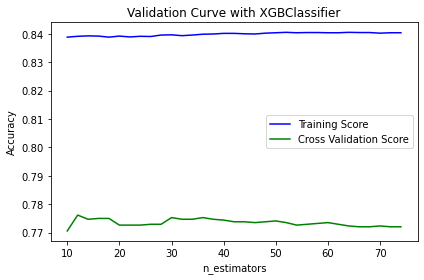

In [510]:
# Creating validation curve to get optimum number of estimators
from sklearn.model_selection import validation_curve

# Setting the range for the parameter (from 10 to 75)
parameter_range = np.arange(10, 75, 2)
 
train_score, test_score = validation_curve(best_model, X, y,
                                       param_name = "n_estimators",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with XGBClassifier")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [511]:
best_model.fit(xtrain, ytrain, verbose=True, early_stopping_rounds=20, eval_metric='auc', eval_set=[(xtest, ytest)])

[0]	validation_0-auc:0.68675
[1]	validation_0-auc:0.68669
[2]	validation_0-auc:0.68669
[3]	validation_0-auc:0.71549
[4]	validation_0-auc:0.71498
[5]	validation_0-auc:0.71444
[6]	validation_0-auc:0.72762
[7]	validation_0-auc:0.72813
[8]	validation_0-auc:0.72788
[9]	validation_0-auc:0.72742
[10]	validation_0-auc:0.72742
[11]	validation_0-auc:0.72790
[12]	validation_0-auc:0.72790
[13]	validation_0-auc:0.74797
[14]	validation_0-auc:0.74268
[15]	validation_0-auc:0.74268
[16]	validation_0-auc:0.74268
[17]	validation_0-auc:0.74268
[18]	validation_0-auc:0.74268
[19]	validation_0-auc:0.74239
[20]	validation_0-auc:0.74239
[21]	validation_0-auc:0.74239
[22]	validation_0-auc:0.74239
[23]	validation_0-auc:0.74352
[24]	validation_0-auc:0.74352
[25]	validation_0-auc:0.74352
[26]	validation_0-auc:0.73939
[27]	validation_0-auc:0.73939
[28]	validation_0-auc:0.73939
[29]	validation_0-auc:0.73939
[30]	validation_0-auc:0.73939
[31]	validation_0-auc:0.73939
[32]	validation_0-auc:0.73861
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9055602161648322,
              enable_categorical=False, eval_metric='logloss',
              gamma=6.144350591818742, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.26311491720604807,
              max_delta_step=0, max_depth=5, min_child_weight=0, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=4.256190226888435, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5697412953372473, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [512]:
# Saving the model

# import joblib
# joblib_file = "XGboost_clf_model.pkl"
# joblib.dump(best_model, joblib_file)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

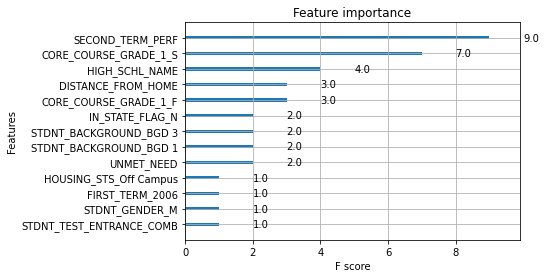

In [513]:
# Getting feature importance from the model
from xgboost import plot_importance

plot_importance(best_model)